## Problem Statement
### Business Problem Overview
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

# Importing key libraries

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import re
import os

import missingno as msno

# Implementation of SimpleImputer using Python
from sklearn.experimental import enable_iterative_imputer  # Needed to enable IterativeImputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier  # Base estimator for AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, roc_auc_score


import matplotlib as mpl
import matplotlib.pyplot as plt

import statsmodels.api as sm

# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#for dirname, _, filenames in os.walk('/kaggle/input/telecom-churn-datasets'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# We can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# We can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### ___Assiging the Dataset to the .csv files___

In [3]:
data_dictionary = pd.read_csv('data_dictionary.csv')
test_df = pd.read_csv('train.csv')
unseen_df = pd.read_csv('test.csv')

In [4]:
print(data_dictionary.shape)
print(test_df.shape)
print(unseen_df.shape)

(36, 2)
(69999, 172)
(30000, 171)


# Understanding the data 

In [5]:
# Understanding the provided dictionary to have an overlook of the data avalible for analysis of the out come
data_dictionary

Acronyms                                        Description
0     CIRCLE_ID  Telecom circle area to which the customer belo...
1           LOC            Local calls  within same telecom circle
2           STD              STD calls  outside the calling circle
3            IC                                     Incoming calls
4            OG                                     Outgoing calls
5           T2T  Operator T to T ie within same operator mobile...
6       T2M                    Operator T to other operator mobile
7       T2O                Operator T to other operator fixed line
8       T2F                         Operator T to fixed lines of T
9       T2C                      Operator T to its own call center
10     ARPU                               Average revenue per user
11      MOU                          Minutes of usage  voice calls
12      AON      Age on network  number of days the customer is...
13     ONNET     All kind of calls within the same operator net...
14   OFFNET       All kind of calls outside the operator T network
15         ROAM  Indicates that customer is in roaming zone dur...
16       SPL                                         Special calls
17      ISD                                              ISD calls
18     RECH                                               Recharge
19      NUM                                                 Number
20      AMT                               Amount in local currency
21      MAX                                                Maximum
22     DATA                                        Mobile internet
23       3G                                              G network
24       AV                                                Average
25      VOL                     Mobile internet usage volume in MB
26       2G                                              G network
27      PCK                  Prepaid service schemes called  PACKS
28    NIGHT         Scheme to use during specific night hours only
29  MONTHLY      Service schemes with validity equivalent to a ...
30    SACHET     Service schemes with validity smaller than a m...
31      *.6                              KPI for the month of June
32      *.7                              KPI for the month of July
33      *.8                            KPI for the month of August
34      FB_USER  Service scheme to avail services of Facebook a...
35      VBC      Volume based cost  when no specific scheme is ...

In [6]:
test_df.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7  ...  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  \
0   87.009  ...            0            0        NaN        NaN        NaN   
1  122.787  ...            0            0        NaN        1.0        NaN   
2  103.176  ...            0            0        NaN        NaN        NaN   
3  205.260  ...            0            0        NaN        NaN        NaN   
4  128.191  ...            1            0        1.0        1.0        1.0   

    aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability  
0  1958         0.0         0.0         0.0                  0  
1   710         0.0         0.0         0.0                  0  
2   882         0.0         0.0         0.0                  0  
3   982         0.0         0.0         0.0                  0  
4   647         0.0         0.0         0.0                  0  

[5 rows x 172 columns]

In [7]:
test_df.columns

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=172)

In [8]:
unseen_df.head()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  69999        109             0.0             0.0             0.0   
1  70000        109             0.0             0.0             0.0   
2  70001        109             0.0             0.0             0.0   
3  70002        109             0.0             0.0             0.0   
4  70003        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   91.882   
1            6/30/2014            7/31/2014            8/31/2014  414.168   
2            6/30/2014            7/31/2014            8/31/2014  329.844   
3            6/30/2014            7/31/2014            8/31/2014   43.550   
4            6/30/2014            7/31/2014            8/31/2014  306.854   

    arpu_7  ...  sachet_3g_6  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  \
0   65.330  ...            0            0            0        NaN        NaN   
1  515.568  ...            0            0            0        NaN        NaN   
2  434.884  ...            0            0            0        NaN        NaN   
3  171.390  ...            0            0            0        NaN        NaN   
4  406.289  ...            0            0            0        NaN        NaN   

   fb_user_8   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  
0        NaN  1692        0.00        0.00        0.00  
1        NaN  2533        0.00        0.00        0.00  
2        NaN   277      525.61      758.41      241.84  
3        NaN  1244        0.00        0.00        0.00  
4        NaN   462        0.00        0.00        0.00  

[5 rows x 171 columns]

In [9]:
print(test_df.columns)

Index(['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
       'arpu_6', 'arpu_7',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7', 'fb_user_8',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'churn_probability'],
      dtype='object', length=172)


In [10]:
# Identifying key variables based on descriptions
ids = ['id', 'circle_id']

# Adding revenue and amount-related variables
total_amounts = [i for i in list(test_df.columns) if re.search('total.+amt', i)]
recharge_amounts = [i for i in list(test_df.columns) if re.search('rech.+amt', i)]
vbc_costs = [i for i in list(test_df.columns) if re.search('vbc', i)]
arpu_values = [i for i in list(test_df.columns) if re.search('arpu', i)]

# Call usage variables
total_outgoing_minutes = [i for i in list(test_df.columns) if re.search('total.+og.+mou', i)]
incoming_minutes = [i for i in list(test_df.columns) if re.search('ic.+mou', i)]
roaming_minutes = [i for i in list(test_df.columns) if re.search('roam.+mou', i)]
special_call_minutes = [i for i in list(test_df.columns) if re.search('spl.+mou', i)]
isd_call_minutes = [i for i in list(test_df.columns) if re.search('isd.+mou', i)]

# On-net and off-net variables
onnet_minutes = [i for i in list(test_df.columns) if re.search('onnet.+mou', i)]
offnetwork_minutes = [i for i in list(test_df.columns) if re.search('offnet.+mou', i)]

# Internet usage variables
volume_3g = [i for i in list(test_df.columns) if re.search('vol.+3g', i)]
volume_2g = [i for i in list(test_df.columns) if re.search('vol.+2g', i)]
average_revenue_3g = [i for i in list(test_df.columns) if re.search('arpu.+3g', i)]
average_revenue_2g = [i for i in list(test_df.columns) if re.search('arpu.+2g', i)]

# Age and scheme-related variables
age_on_network = [i for i in list(test_df.columns) if re.search('aon', i)]
night_usage = [i for i in list(test_df.columns) if re.search('night', i)]
monthly_schemes = [i for i in list(test_df.columns) if re.search('monthly', i)]
sachet_schemes = [i for i in list(test_df.columns) if re.search('sachet', i)]
fb_user = [i for i in list(test_df.columns) if re.search('fb_user', i)]

# Call type-specific usage
t2t_calls = [i for i in list(test_df.columns) if re.search('t2t', i)]
t2m_calls = [i for i in list(test_df.columns) if re.search('t2m', i)]
t2o_calls = [i for i in list(test_df.columns) if re.search('t2o', i)]
t2f_calls = [i for i in list(test_df.columns) if re.search('t2f', i)]
t2c_calls = [i for i in list(test_df.columns) if re.search('t2c', i)]

# KPIs for specific months
monthly_kpis = [i for i in list(test_df.columns) if re.search(r'\.\d+', i)]

# Storing them in a single flat list
variables = [
    *ids,
    *total_amounts,
    *recharge_amounts,
    *vbc_costs,
    *arpu_values,
    *total_outgoing_minutes,
    *incoming_minutes,
    *roaming_minutes,
    *special_call_minutes,
    *isd_call_minutes,
    *onnet_minutes,
    *offnetwork_minutes,
    *volume_3g,
    *volume_2g,
    *average_revenue_3g,
    *average_revenue_2g,
    *age_on_network,
    *night_usage,
    *monthly_schemes,
    *sachet_schemes,
    *fb_user,
    *t2t_calls,
    *t2m_calls,
    *t2o_calls,
    *t2f_calls,
    *t2c_calls,
    *monthly_kpis,
    'churn_probability'
]

# Selecting the relevant subset of data
data = test_df[variables].set_index('id')


In [11]:
data

circle_id  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  \
id                                                                       
0            109                77                65                10   
1            109                 0               145                50   
2            109                70               120                 0   
3            109               160               240               130   
4            109               290               136               122   
...          ...               ...               ...               ...   
69994        109                50               397               512   
69995        109               200               313               308   
69996        109               626               250               397   
69997        109               379               252               145   
69998        109               198                50               198   

       total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  \
id                                                                            
0                    77                65                10              65   
1                     0               145                50               0   
2                    70               120                 0              70   
3                   160               240               130             110   
4                   290               136               122              50   
...                 ...               ...               ...             ...   
69994                50               397               512              50   
69995               200               313               308              90   
69996               626               250               397             279   
69997               379               252               145             200   
69998               198                50               198             198   

       max_rech_amt_7  max_rech_amt_8  ...  std_ic_t2f_mou_6  \
id                                     ...                     
0                  65              10  ...               0.0   
1                 145              50  ...               0.0   
2                  70               0  ...               0.0   
3                 110              50  ...               0.0   
4                  41              30  ...               0.0   
...               ...             ...  ...               ...   
69994             110             130  ...               0.0   
69995              44              44  ...               0.0   
69996             250             349  ...               2.5   
69997             252             145  ...               0.0   
69998              50             198  ...               0.0   

       std_ic_t2f_mou_7  std_ic_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
id                                                                              
0                   0.0              0.00              0.00              0.00   
1                   0.0              0.00              0.00             22.01   
2                   0.0              0.00              2.14              0.00   
3                   0.0              0.00              0.00              0.00   
4                   0.0              0.00              0.00              9.85   
...                 ...               ...               ...               ...   
69994               0.0              0.00              0.00              2.43   
69995               0.0              0.00              0.00              4.01   
69996               0.0              2.48              0.00              4.10   
69997               0.0              1.28              0.00              0.00   
69998               0.0              0.00              0.00              0.00   

       loc_og_t2c_mou_8  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  \
id                                              

In [12]:
# Drop duplicate columns based on their headers
data = data.loc[:, ~data.columns.duplicated()]

In [13]:
data.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69998
Data columns (total 132 columns):
 #    Column              Dtype  
---   ------              -----  
 0    circle_id           int64  
 1    total_rech_amt_6    int64  
 2    total_rech_amt_7    int64  
 3    total_rech_amt_8    int64  
 4    max_rech_amt_6      int64  
 5    max_rech_amt_7      int64  
 6    max_rech_amt_8      int64  
 7    av_rech_amt_data_6  float64
 8    av_rech_amt_data_7  float64
 9    av_rech_amt_data_8  float64
 10   aug_vbc_3g          float64
 11   jul_vbc_3g          float64
 12   jun_vbc_3g          float64
 13   arpu_6              float64
 14   arpu_7              float64
 15   arpu_8              float64
 16   arpu_3g_6           float64
 17   arpu_3g_7           float64
 18   arpu_3g_8           float64
 19   arpu_2g_6           float64
 20   arpu_2g_7           float64
 21   arpu_2g_8           float64
 22   total_og_mou_6      float64
 23   total_og_mou_7      float64
 24   

### New Features and Insights
#### Roaming and Special Call Minutes:
Investigate whether high roaming or special call usage impacts churn.
Analyze user clusters based on roaming and SPL usage.

#### Social Media Scheme (FB_USER):
Determine if social media scheme users churn less due to dependency.
Compare FB_USER adoption rates and churn behavior.

#### Night, Monthly, and Sachet Schemes:
Check if short-term (SACHET) or specific time-based (NIGHT) schemes are more prone to churn.
Conduct a time-series analysis of churn by scheme type.

#### Call Types (T2T, T2M, T2O, etc.):
Analyze whether certain call types (e.g., T2M or T2F) correlate with churn due to cost or quality issues.

#### Monthly KPIs:
Correlate monthly KPIs with churn trends to identify service-level impacts.

In [14]:
data.describe(include='all')

circle_id  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  \
count    69999.0      69999.000000      69999.000000      69999.000000   
mean       109.0        328.139788        322.376363        323.846355   
std          0.0        404.211068        411.070120        426.181405   
min        109.0          0.000000          0.000000          0.000000   
25%        109.0        110.000000        100.000000         90.000000   
50%        109.0        229.000000        220.000000        225.000000   
75%        109.0        438.000000        430.000000        436.000000   
max        109.0      35190.000000      40335.000000      45320.000000   

       max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  av_rech_amt_data_6  \
count    69999.000000    69999.000000    69999.000000        17568.000000   
mean       104.569265      104.137573      107.540351          192.831096   
std        121.407701      120.782543      124.396750          190.623115   
min          0.000000        0.000000        0.000000            1.000000   
25%         30.000000       30.000000       30.000000           82.000000   
50%        110.000000      110.000000       98.000000          154.000000   
75%        120.000000      128.000000      144.000000          252.000000   
max       4010.000000     3299.000000     4449.000000         5920.000000   

       av_rech_amt_data_7  av_rech_amt_data_8  ...  std_og_t2f_mou_6  \
count        17865.000000        18417.000000  ...      67231.000000   
mean           201.455940          196.815792  ...          1.126377   
std            198.346141          192.280532  ...          8.136645   
min              1.000000            1.000000  ...          0.000000   
25%             92.000000           84.000000  ...          0.000000   
50%            154.000000          154.000000  ...          0.000000   
75%            252.000000          252.000000  ...          0.000000   
max           4365.000000         4076.000000  ...        628.560000   

       std_og_t2f_mou_7  std_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
count      67312.000000      66296.000000      67231.000000      67312.000000   
mean           1.084062          1.057739          1.126025          1.361052   
std            8.325206          7.696853          5.741811          7.914113   
min            0.000000          0.000000          0.000000          0.000000   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.000000   
max          465.790000        354.160000        342.860000        916.240000   

       loc_og_t2c_mou_8  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  \
count      66296.000000           67231.0           67312.0           66296.0   
mean           1.420840               0.0               0.0               0.0   
std            6.542202               0.0               0.0               0.0   
min            0.000000               0.0               0.0               0.0   
25%            0.000000               0.0               0.0               0.0   
50%            0.000000               0.0               0.0               0.0   
75%            0.000000               0.0               0.0               0.0   
max          351.830000               0.0               0.0               0.0   

       churn_probability  
count       69999.000000  
mean            0.101887  
std             0.302502  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             0.000000  
max             1.000000  

[8 rows x 132 columns]

## Handeling Missing Values 

Analysing the new data for missing values using missingno Library

<Axes: >

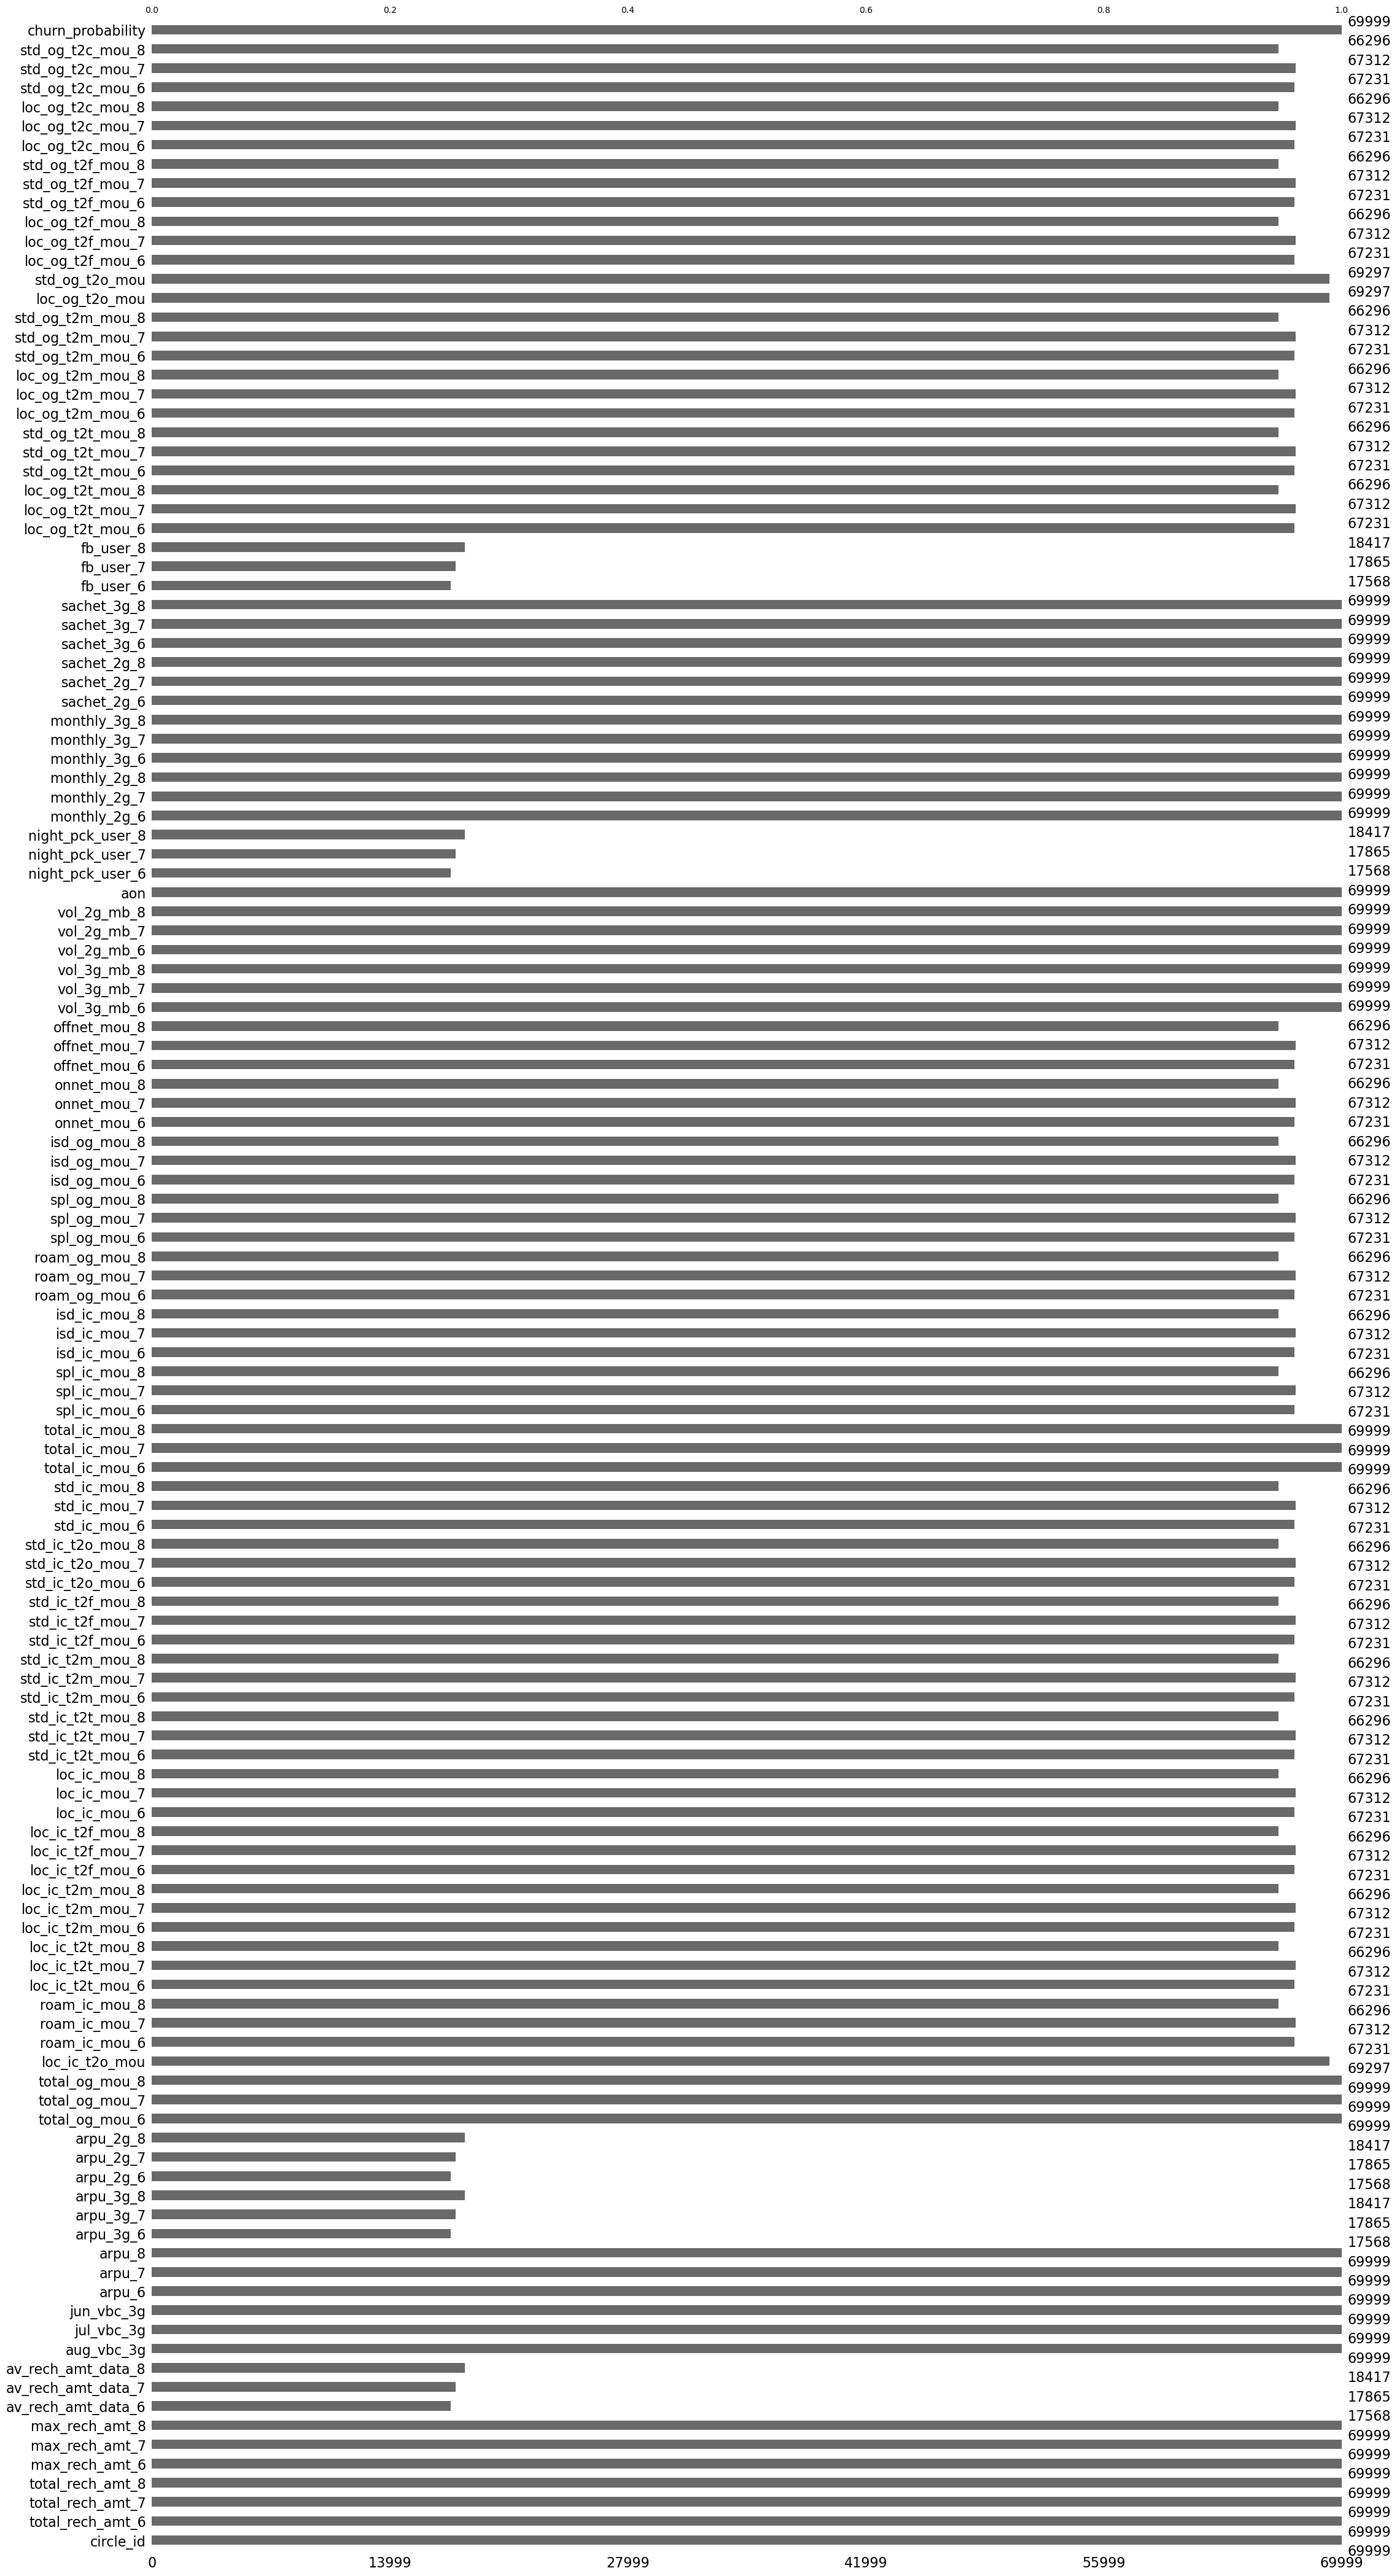

In [15]:
msno.bar(data)

<Axes: >

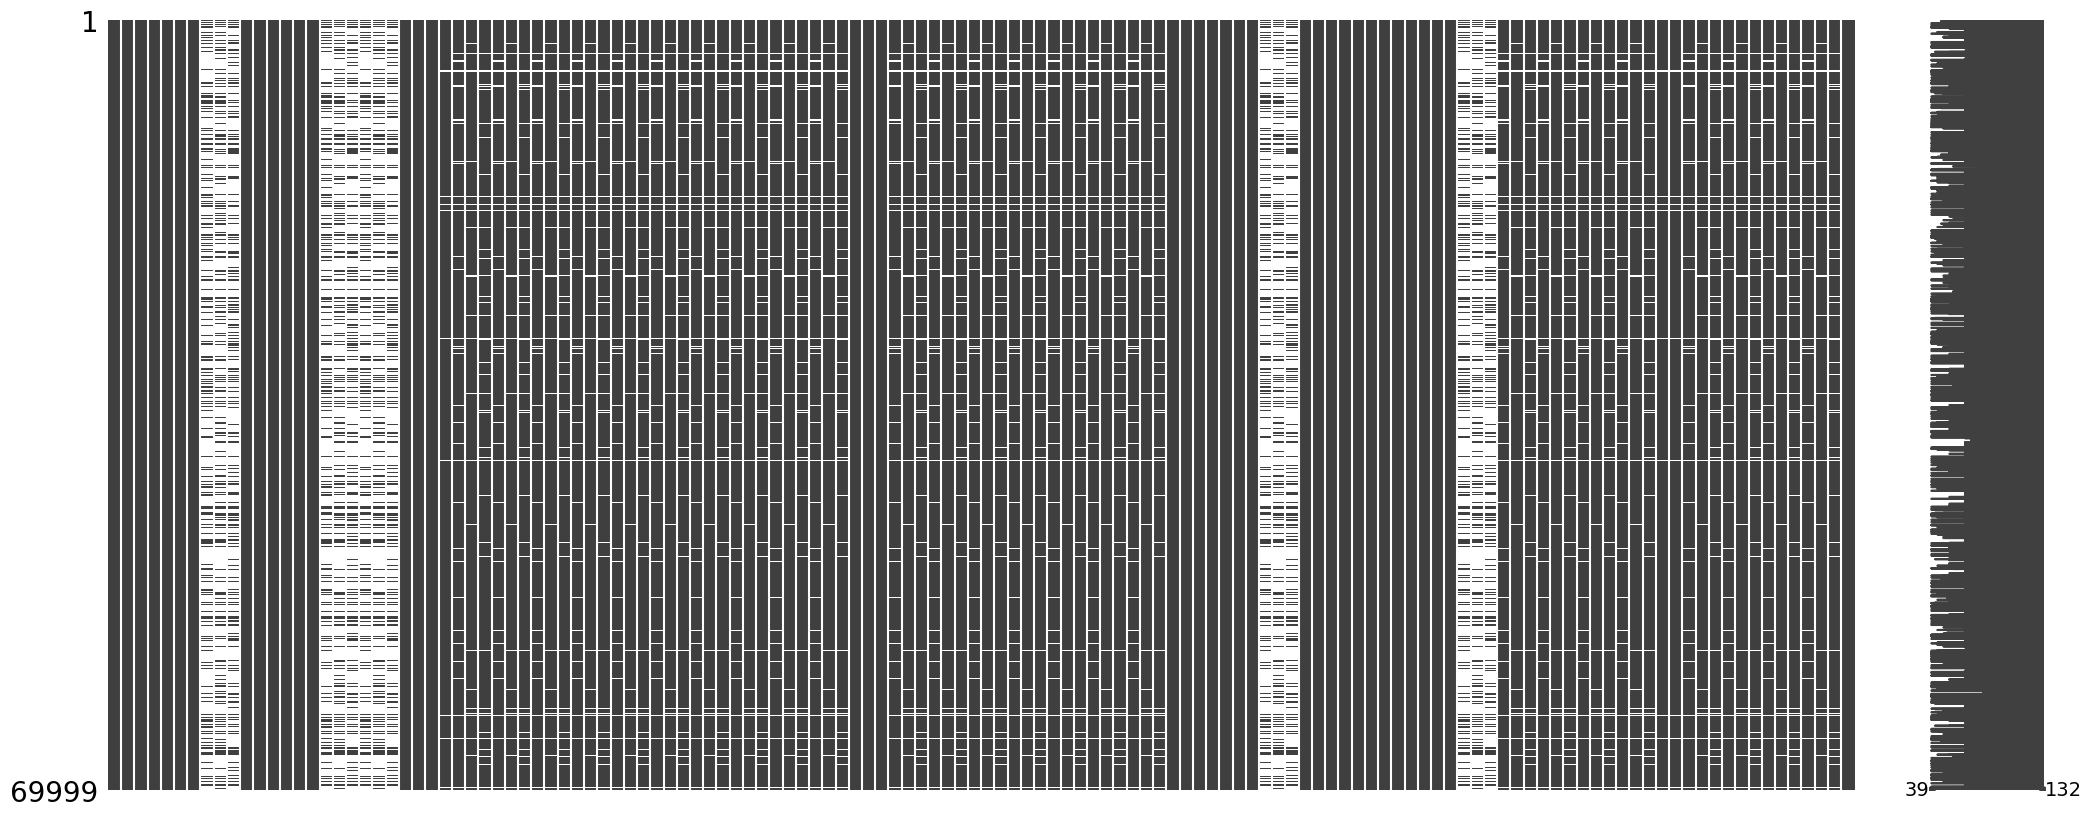

In [16]:
msno.matrix(data)

In [17]:
# Calculating the Missing Percentage values

missing_data_percent = 100*(data.isnull().sum()/len(data))
missing_data_percent

circle_id            0.000000
total_rech_amt_6     0.000000
total_rech_amt_7     0.000000
total_rech_amt_8     0.000000
max_rech_amt_6       0.000000
                       ...   
loc_og_t2c_mou_8     5.290076
std_og_t2c_mou_6     3.954342
std_og_t2c_mou_7     3.838626
std_og_t2c_mou_8     5.290076
churn_probability    0.000000
Length: 132, dtype: float64

In [18]:
new_vars = missing_data_percent[missing_data_percent.le(40)].index # checks for columns with missing data percentages less than or equal to 40% (le stands for "less than or equal").
new_vars

Index(['circle_id', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'aug_vbc_3g',
       'jul_vbc_3g', 'jun_vbc_3g',
       ...
       'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8',
       'churn_probability'],
      dtype='object', length=117)

In [19]:
# Drop columns not in `new_vars`
data_f = data[new_vars]

# Check shapes
data_f.shape, data.shape


((69999, 117), (69999, 132))

### Imputing the Values those are missing for the new variables 

In [20]:
missing_data_percent_nv = data_f.isnull().any()
impute_cols = missing_data_percent_nv[missing_data_percent_nv.gt(0)].index # The gt(0) function is a shorthand for "greater than 0"
impute_cols

Index(['loc_ic_t2o_mou', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8',
       'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6',
       'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6',
       'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6',
       'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_6',
       'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_mou_6', 'std_ic_mou_7',
       'std_ic_mou_8', 'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8',
       'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7',
       'spl_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offne

<Axes: >

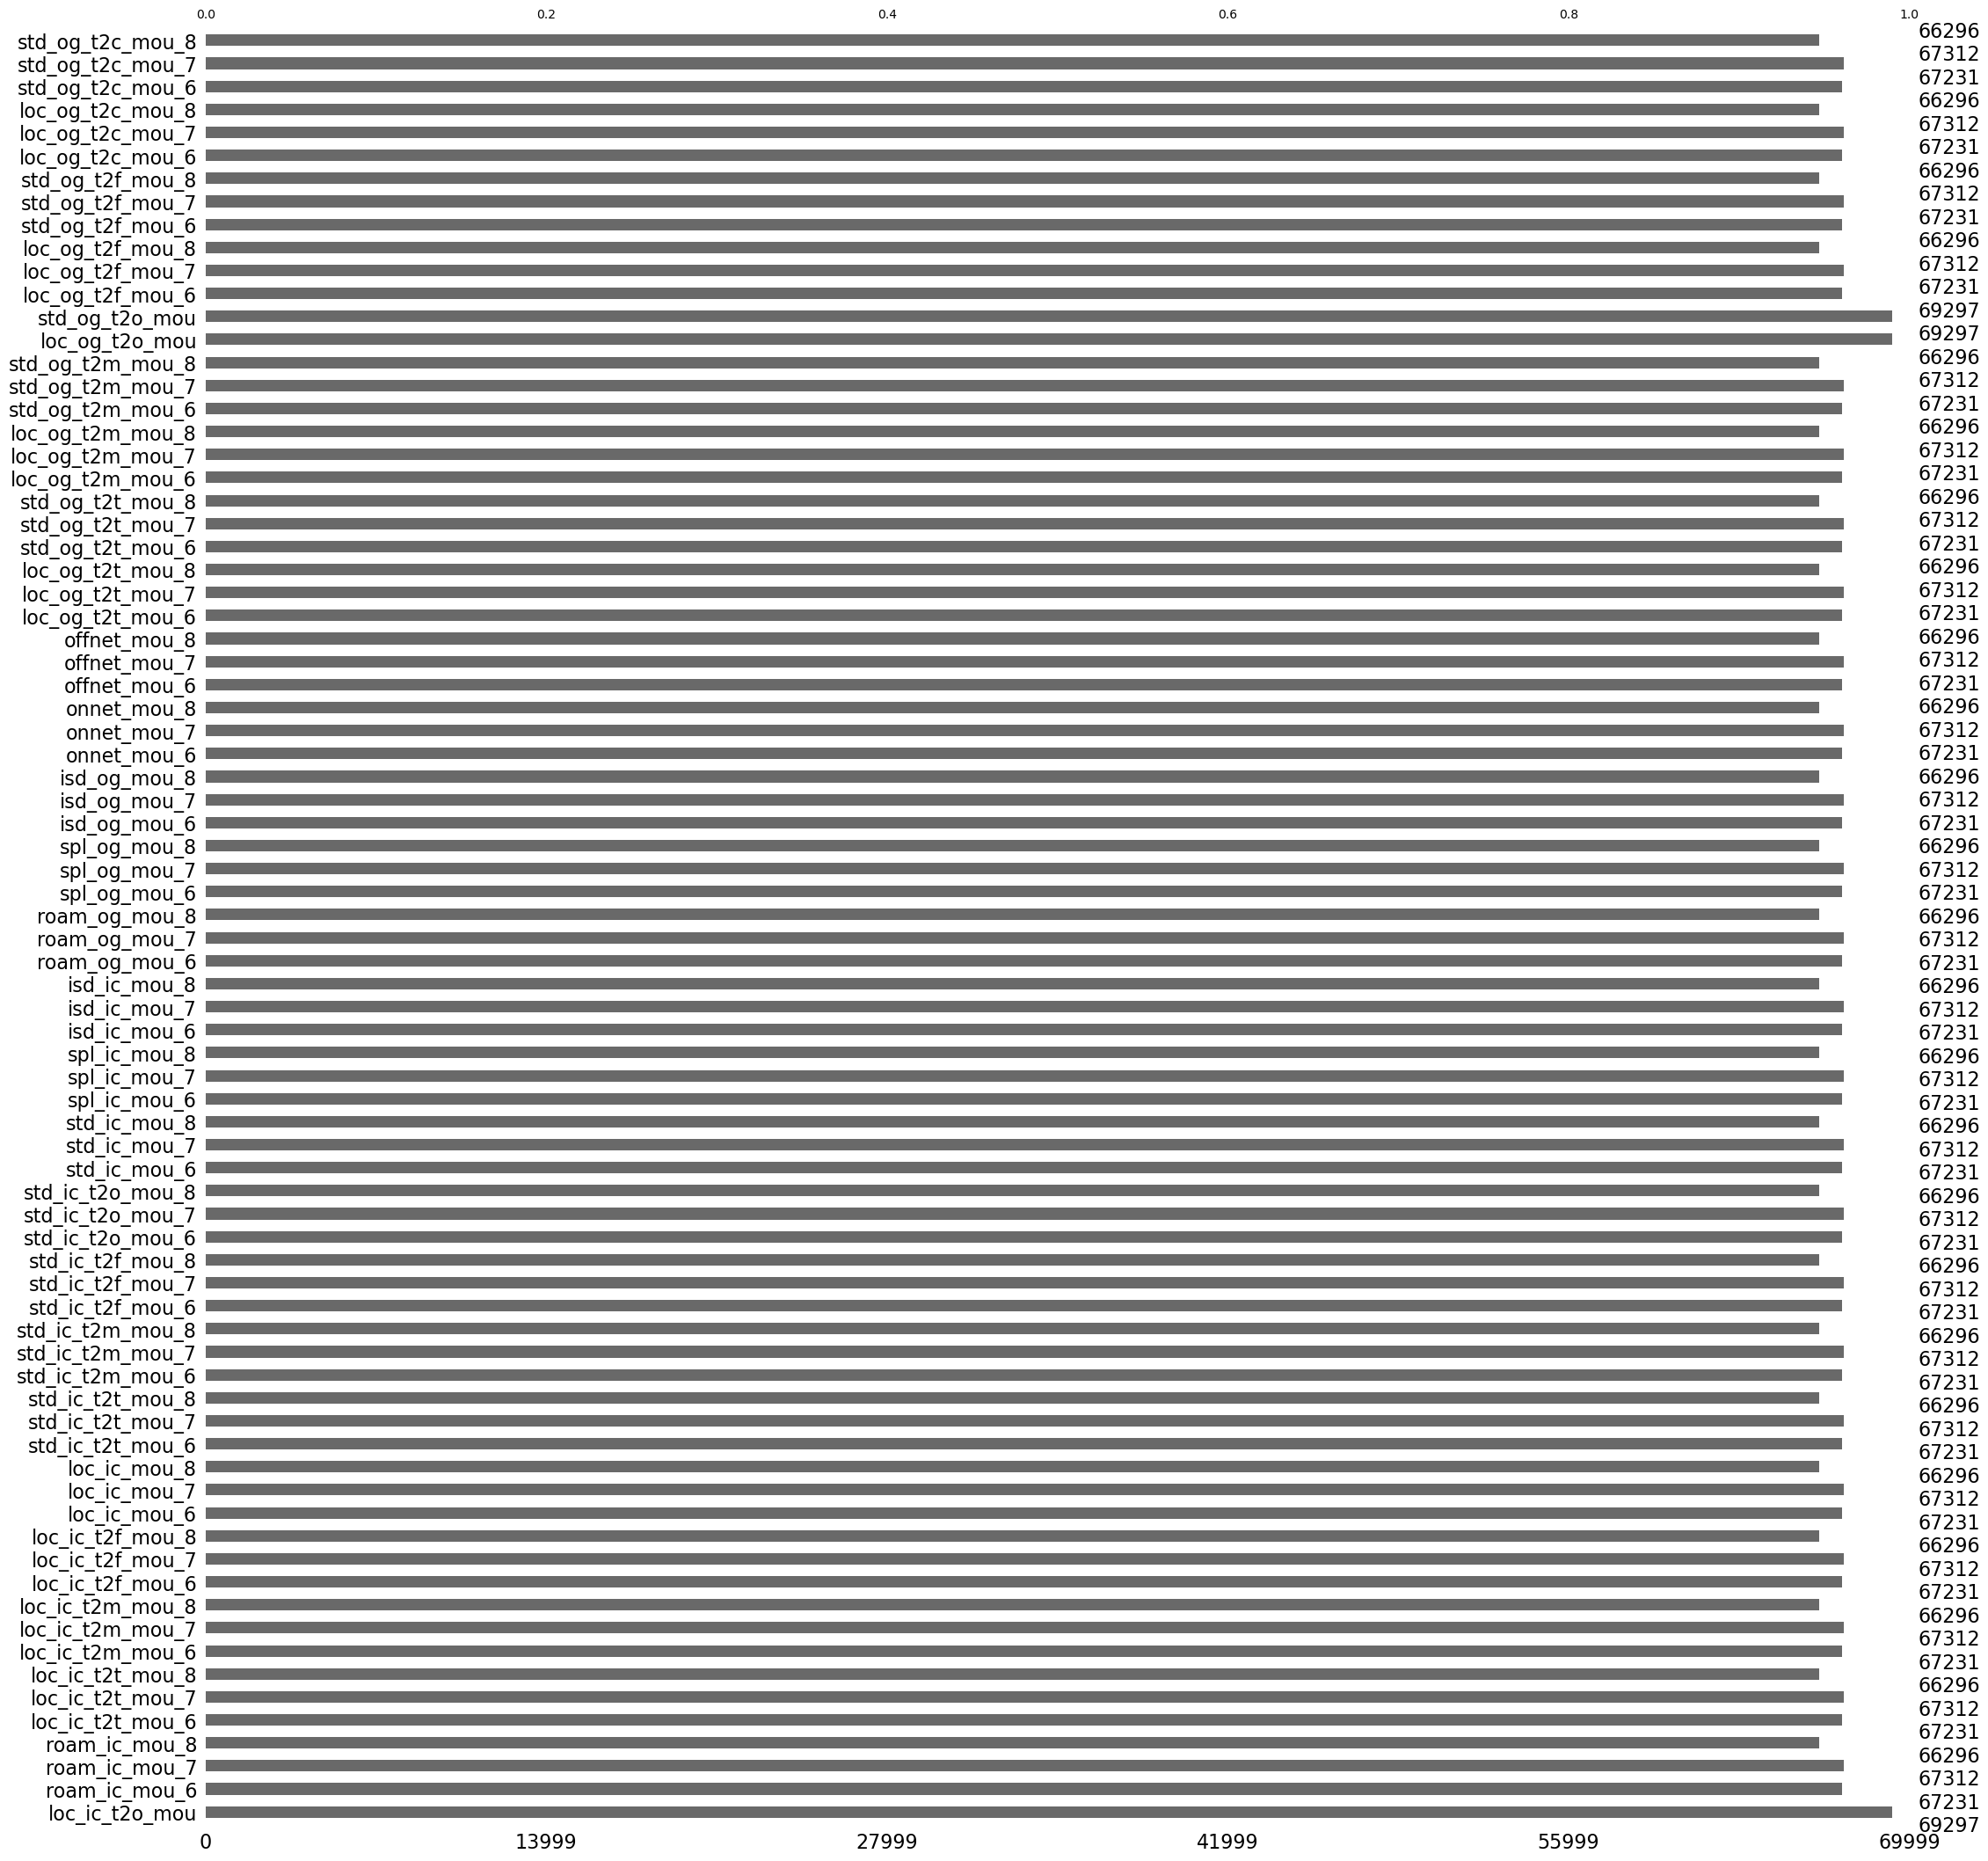

In [21]:
msno.bar(data_f[impute_cols])

In [22]:
mice_imputer = IterativeImputer(max_iter=2, random_state=42)
data_f[impute_cols]  = mice_imputer.fit_transform(data_f[impute_cols])

<Axes: >

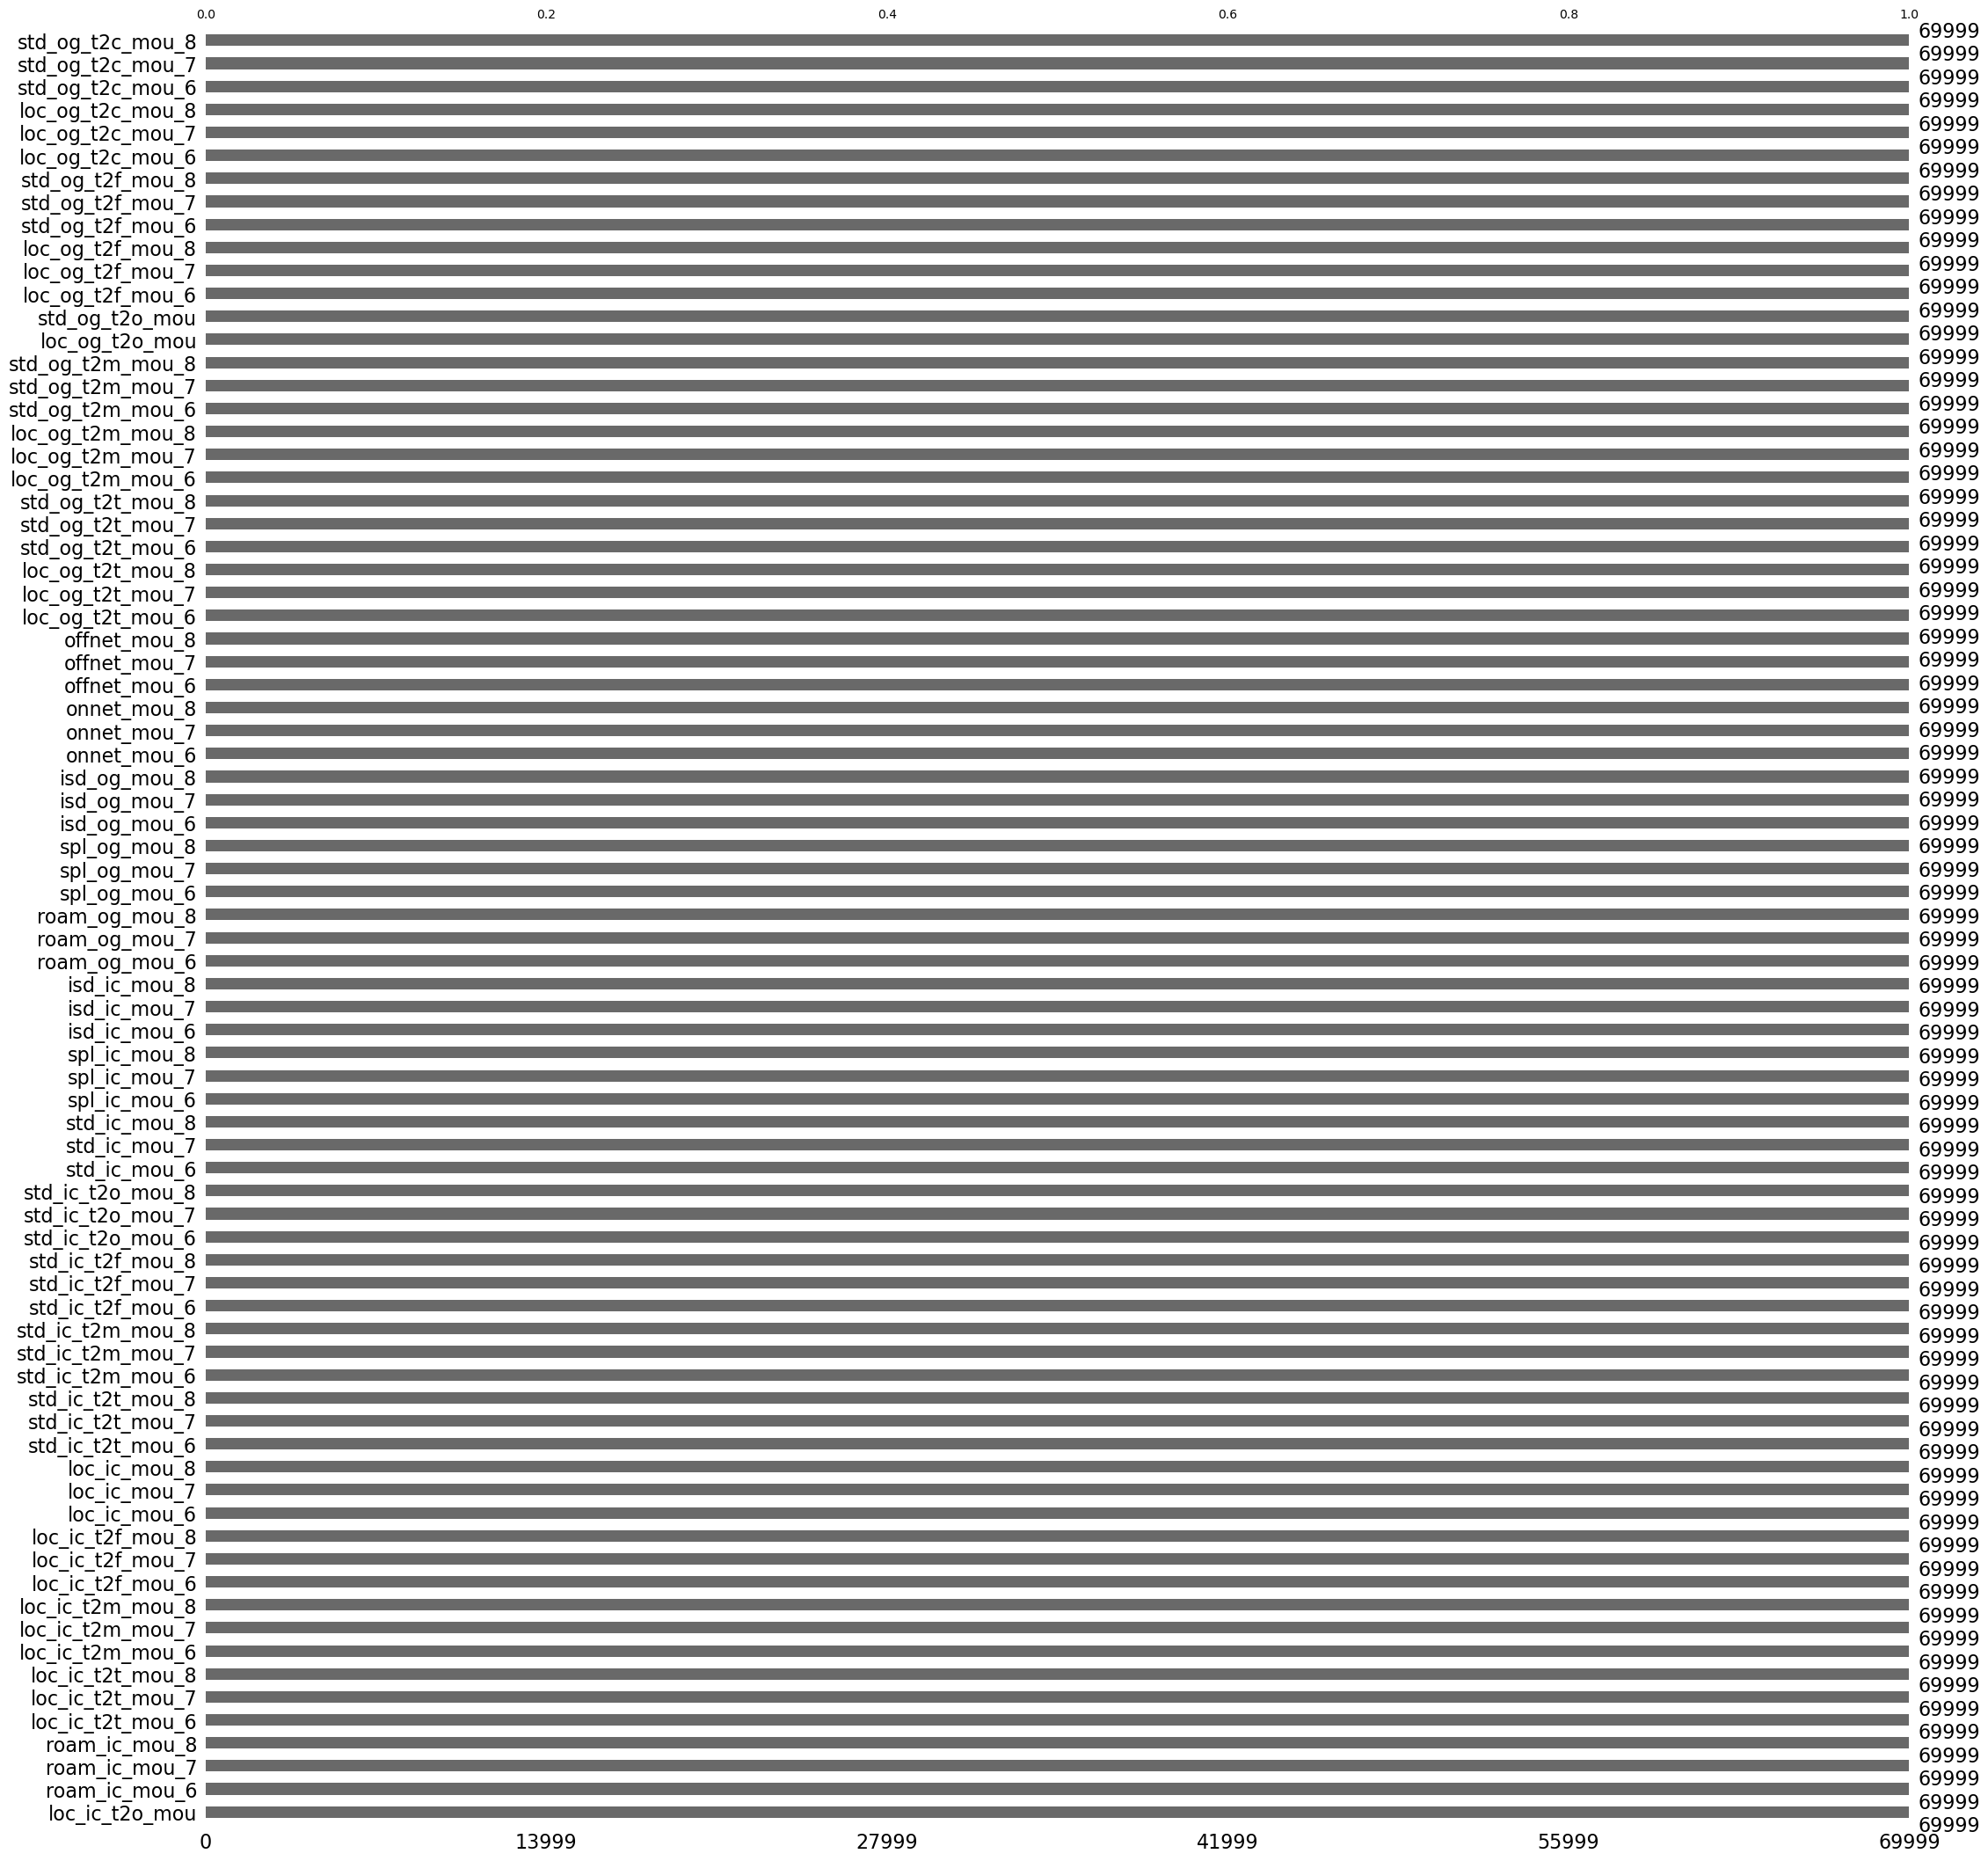

In [23]:
msno.bar(data_f[impute_cols])

In [24]:
data_f.head()

circle_id  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  \
id                                                                    
0         109                77                65                10   
1         109                 0               145                50   
2         109                70               120                 0   
3         109               160               240               130   
4         109               290               136               122   

    max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  aug_vbc_3g  jul_vbc_3g  \
id                                                                           
0               65              65              10         0.0         0.0   
1                0             145              50         0.0         0.0   
2               70              70               0         0.0         0.0   
3              110             110              50         0.0         0.0   
4               50              41              30         0.0         0.0   

    jun_vbc_3g  ...  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
id              ...                                                         
0          0.0  ...              0.00               0.0               0.0   
1          0.0  ...              0.00               0.0               0.0   
2          0.0  ...              0.00               0.0               0.0   
3          0.0  ...              0.56               0.0               0.0   
4          0.0  ...              0.00               0.0               0.0   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  std_og_t2c_mou_6  \
id                                                                           
0               0.00              0.00              0.00               0.0   
1               0.00             22.01             29.79               0.0   
2               2.14              0.00              0.00               0.0   
3               0.00              0.00              8.03               0.0   
4               0.00              9.85              0.00               0.0   

    std_og_t2c_mou_7  std_og_t2c_mou_8  churn_probability  
id                                                         
0                0.0               0.0                  0  
1                0.0               0.0                  0  
2                0.0               0.0                  0  
3                0.0               0.0                  0  
4                0.0               0.0                  0  

[5 rows x 117 columns]

In [25]:
data_f.describe()

circle_id  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  \
count    69999.0      69999.000000      69999.000000      69999.000000   
mean       109.0        328.139788        322.376363        323.846355   
std          0.0        404.211068        411.070120        426.181405   
min        109.0          0.000000          0.000000          0.000000   
25%        109.0        110.000000        100.000000         90.000000   
50%        109.0        229.000000        220.000000        225.000000   
75%        109.0        438.000000        430.000000        436.000000   
max        109.0      35190.000000      40335.000000      45320.000000   

       max_rech_amt_6  max_rech_amt_7  max_rech_amt_8    aug_vbc_3g  \
count    69999.000000    69999.000000    69999.000000  69999.000000   
mean       104.569265      104.137573      107.540351     68.108597   
std        121.407701      120.782543      124.396750    269.328659   
min          0.000000        0.000000        0.000000      0.000000   
25%         30.000000       30.000000       30.000000      0.000000   
50%        110.000000      110.000000       98.000000      0.000000   
75%        120.000000      128.000000      144.000000      0.000000   
max       4010.000000     3299.000000     4449.000000  12916.220000   

         jul_vbc_3g   jun_vbc_3g  ...  std_og_t2f_mou_6  std_og_t2f_mou_7  \
count  69999.000000  69999.00000  ...      69999.000000      69999.000000   
mean      65.935830     60.07674  ...          1.128589          1.084111   
std      267.899034    257.22681  ...          7.983782          8.170035   
min        0.000000      0.00000  ...        -34.212337        -12.673497   
25%        0.000000      0.00000  ...          0.000000          0.000000   
50%        0.000000      0.00000  ...          0.000000          0.000000   
75%        0.000000      0.00000  ...          0.000000          0.000000   
max     9165.600000  11166.21000  ...        628.560000        465.790000   

       std_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
count      69999.000000      69999.000000      69999.000000      69999.000000   
mean           1.059044          1.131622          1.366630          1.422248   
std            7.505885          5.632099          7.774423          6.379068   
min          -16.700180         -3.207760        -15.821390         -8.476421   
25%            0.000000          0.000000          0.000000          0.000000   
50%            0.000000          0.000000          0.000000          0.000000   
75%            0.000000          0.000000          0.000000          0.130000   
max          354.160000        342.860000        916.240000        351.830000   

       std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  churn_probability  
count           69999.0           69999.0           69999.0       69999.000000  
mean                0.0               0.0               0.0           0.101887  
std                 0.0               0.0               0.0           0.302502  
min                 0.0               0.0               0.0           0.000000  
25%                 0.0               0.0               0.0           0.000000  
50%                 0.0               0.0               0.0           0.000000  
75%                 0.0               0.0               0.0           0.000000  
max                 0.0               0.0               0.0           1.000000  

[8 rows x 117 columns]

In [26]:
data_f.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69999 entries, 0 to 69998
Data columns (total 117 columns):
 #    Column             Dtype  
---   ------             -----  
 0    circle_id          int64  
 1    total_rech_amt_6   int64  
 2    total_rech_amt_7   int64  
 3    total_rech_amt_8   int64  
 4    max_rech_amt_6     int64  
 5    max_rech_amt_7     int64  
 6    max_rech_amt_8     int64  
 7    aug_vbc_3g         float64
 8    jul_vbc_3g         float64
 9    jun_vbc_3g         float64
 10   arpu_6             float64
 11   arpu_7             float64
 12   arpu_8             float64
 13   total_og_mou_6     float64
 14   total_og_mou_7     float64
 15   total_og_mou_8     float64
 16   loc_ic_t2o_mou     float64
 17   roam_ic_mou_6      float64
 18   roam_ic_mou_7      float64
 19   roam_ic_mou_8      float64
 20   loc_ic_t2t_mou_6   float64
 21   loc_ic_t2t_mou_7   float64
 22   loc_ic_t2t_mou_8   float64
 23   loc_ic_t2m_mou_6   float64
 24   loc_ic_t2m_mou_7   float64

# Exploratory Data Analysis (EDA)¶

<Axes: >

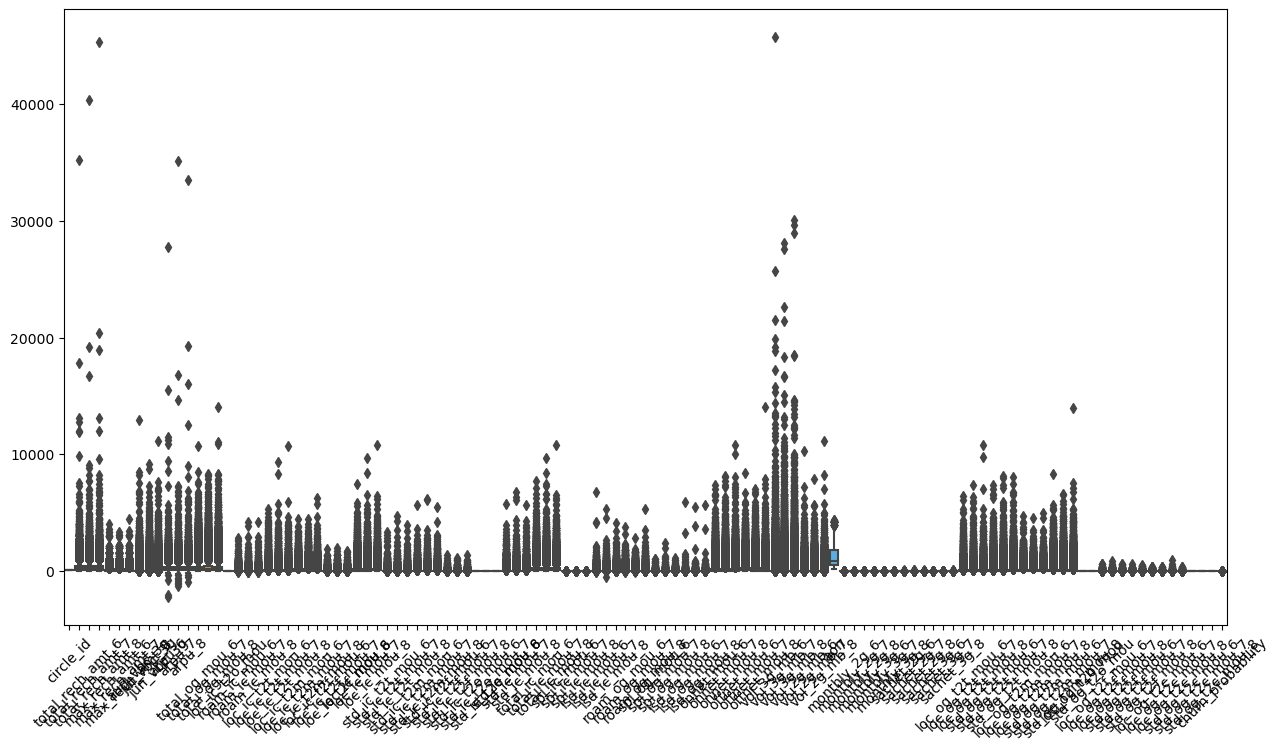

In [27]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.boxplot(data = data_f)


## Filter high-value customers
#### to get a clearer view using EDA

In [28]:
id_cols=[x for x in test_df.columns if 'id' in x]
amt_cols=[x for x in test_df.columns if 'amt' in x]
mou_cols=[x for x in test_df.columns if 'mou' in x]
date_cols=[x for x in test_df.columns if 'date' in x]
arpu_cols=['arpu_6','arpu_7','arpu_8']
aon_cols=['aon']
target_col=['churn_probability']
other_col=[x for x in list(test_df.columns) if x not in id_cols + amt_cols + mou_cols + date_cols + arpu_cols + aon_cols + target_col] 

In [29]:
id_cols=[x for x in unseen_df.columns if 'id' in x]
amt_cols=[x for x in unseen_df.columns if 'amt' in x]
mou_cols=[x for x in unseen_df.columns if 'mou' in x]
date_cols=[x for x in unseen_df.columns if 'date' in x]
arpu_cols=['arpu_6','arpu_7','arpu_8']
aon_cols=['aon']
target_col=['churn_probability']
other_col=[x for x in list(unseen_df.columns) if x not in id_cols + amt_cols + mou_cols + date_cols + arpu_cols + aon_cols + target_col] 

In [30]:
test_df[arpu_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   arpu_6  69999 non-null  float64
 1   arpu_7  69999 non-null  float64
 2   arpu_8  69999 non-null  float64
dtypes: float64(3)
memory usage: 1.6 MB


In [31]:
test_df[arpu_cols].describe()

arpu_6        arpu_7        arpu_8
count  69999.000000  69999.000000  69999.000000
mean     283.134365    278.185912    278.858826
std      334.213918    344.366927    351.924315
min    -2258.709000  -1289.715000   -945.808000
25%       93.581000     86.714000     84.095000
50%      197.484000    191.588000    192.234000
75%      370.791000    365.369500    369.909000
max    27731.088000  35145.834000  33543.624000

In [32]:
test_df['avg_arpu']=(test_df['arpu_6']+test_df['arpu_6']+test_df['arpu_6'])/3

In [33]:
test_df.avg_arpu.quantile(0.7)

323.9982

In [34]:
high_val_cust = test_df.loc[test_df.avg_arpu > test_df.avg_arpu.quantile(0.7), :]
high_val_cust = high_val_cust.reset_index(drop=True)
high_val_cust.shape

(21000, 173)

In [35]:
high_val_cust['tc_mou_8'] = high_val_cust.total_ic_mou_8 + high_val_cust.total_og_mou_8

In [36]:
high_val_cust['total_internet_mb_8'] =  high_val_cust.vol_2g_mb_8 + high_val_cust.vol_3g_mb_8

In [37]:
high_val_cust['churn'] = high_val_cust.apply(lambda row: 1 if (row.tc_mou_8 == 0 and row.total_internet_mb_8 == 0) else 0, axis=1)

In [38]:
high_val_cust[['churn','total_ic_mou_8','total_og_mou_8','vol_2g_mb_8','vol_3g_mb_8']]

churn  total_ic_mou_8  total_og_mou_8  vol_2g_mb_8  vol_3g_mb_8
0          0           17.31            3.14         0.00          0.0
1          0           26.99          687.41         0.00          0.0
2          0          369.53          227.41         0.00          0.0
3          0          629.94          391.53       354.35          0.0
4          0          203.29          387.81         0.00          0.0
...      ...             ...             ...          ...          ...
20995      0           98.06          474.51         0.00          0.0
20996      0          366.89          242.69         0.00          0.0
20997      0          551.36         1099.61         0.00          0.0
20998      0          318.86          915.38         0.00          0.0
20999      0          414.54          342.29         0.00          0.0

[21000 rows x 5 columns]

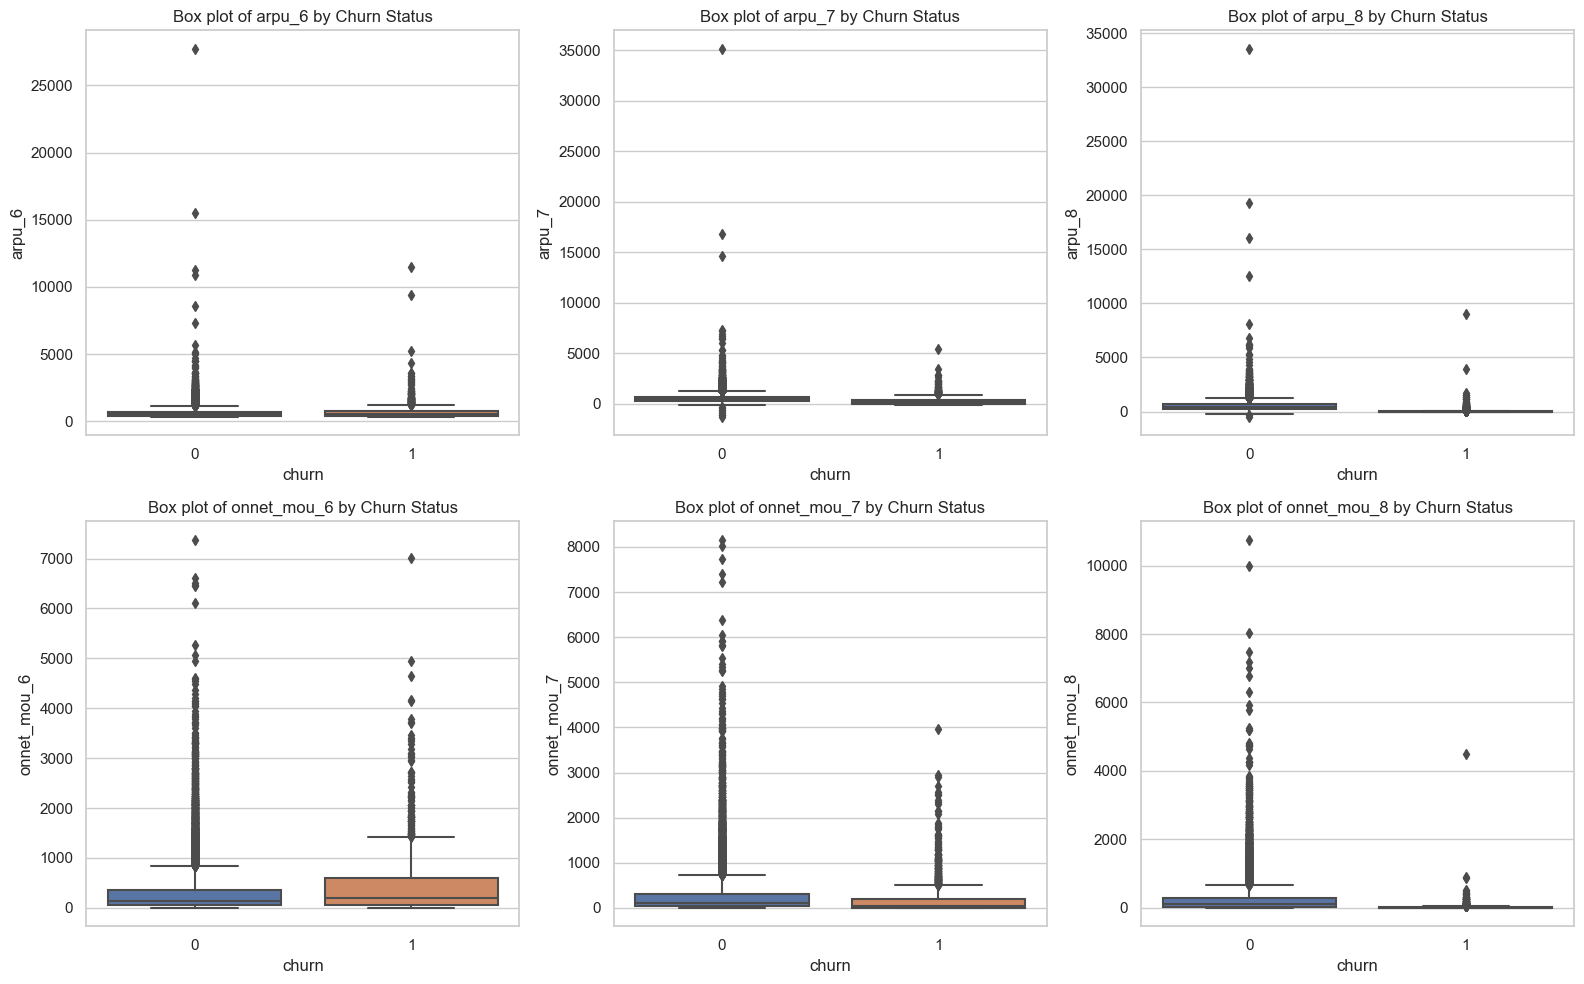

In [39]:
sns.set(style="whitegrid")


features_to_plot = ['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'churn']

# Box plots to visualize the distribution of these features, separated by churn status
plt.figure(figsize=(16, 10))
for i, feature in enumerate(features_to_plot[:-1]):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='churn', y=feature, data=high_val_cust)
    plt.title(f'Box plot of {feature} by Churn Status')

plt.tight_layout()
plt.show()

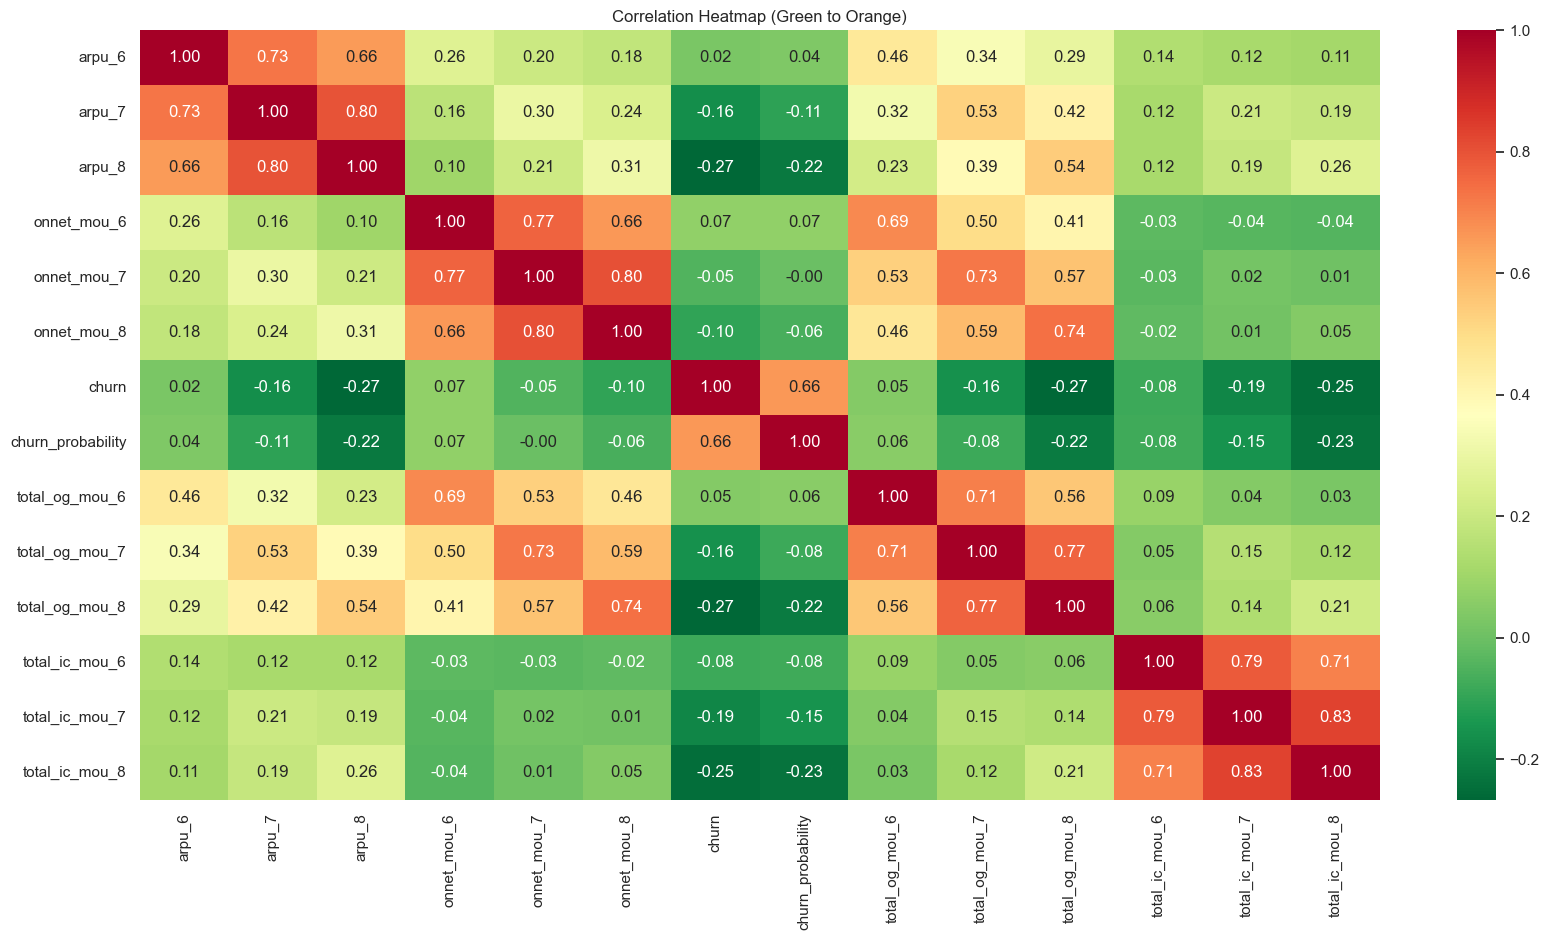

In [40]:
plt.figure(figsize=(20, 10))
mou_total = [col for col in high_val_cust.columns if 'mou' in col.lower() and 'total' in col.lower()]
correlation_matrix = high_val_cust[['arpu_6', 'arpu_7', 'arpu_8','onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8','churn','churn_probability']+mou_total].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='RdYlGn_r', cbar=True)
plt.title('Correlation Heatmap (Green to Orange)')
plt.show()

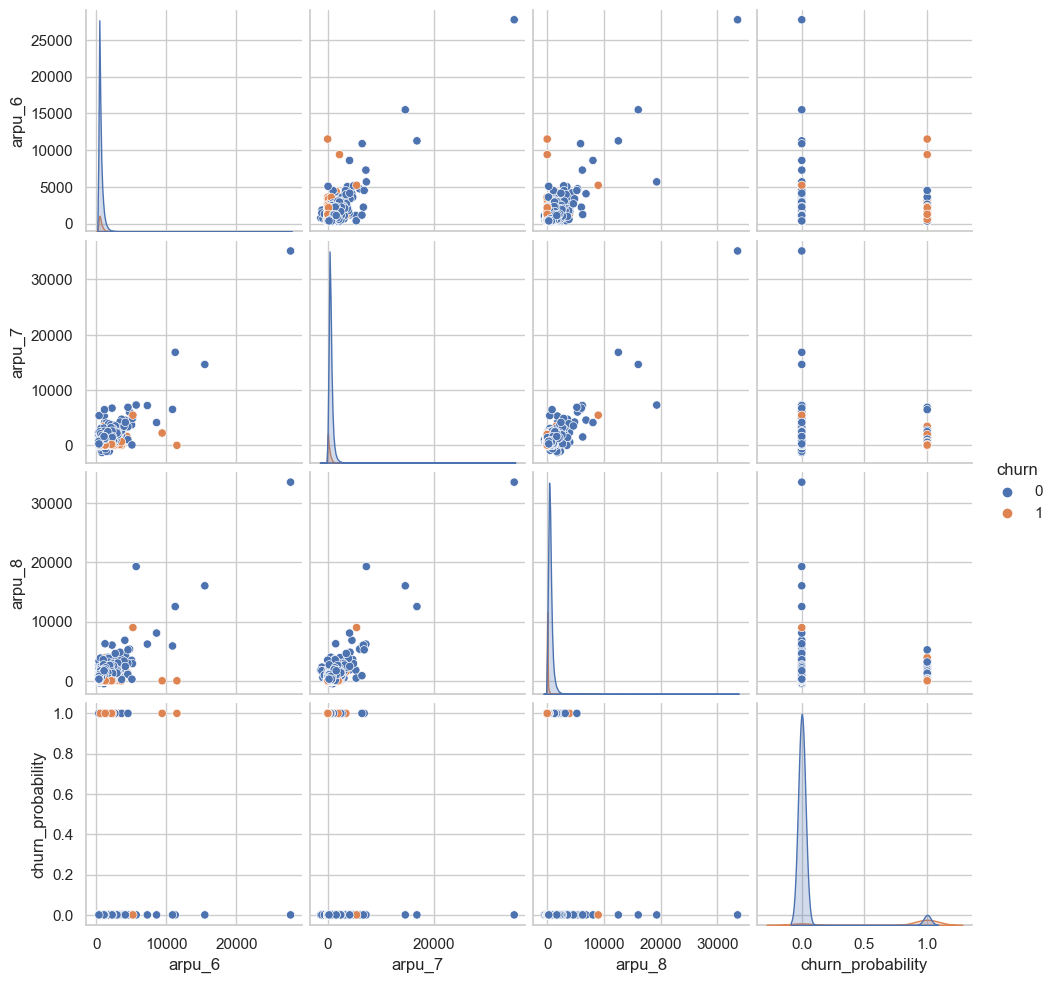

In [41]:
selected_for_pairplot = [
    'arpu_6', 'arpu_7', 'arpu_8', 
     'churn', 'churn_probability'
]

sns.pairplot(high_val_cust[selected_for_pairplot], hue='churn')
plt.show()

In [42]:
amount_data = test_df.loc[:, test_df.columns.str.contains('amt')]

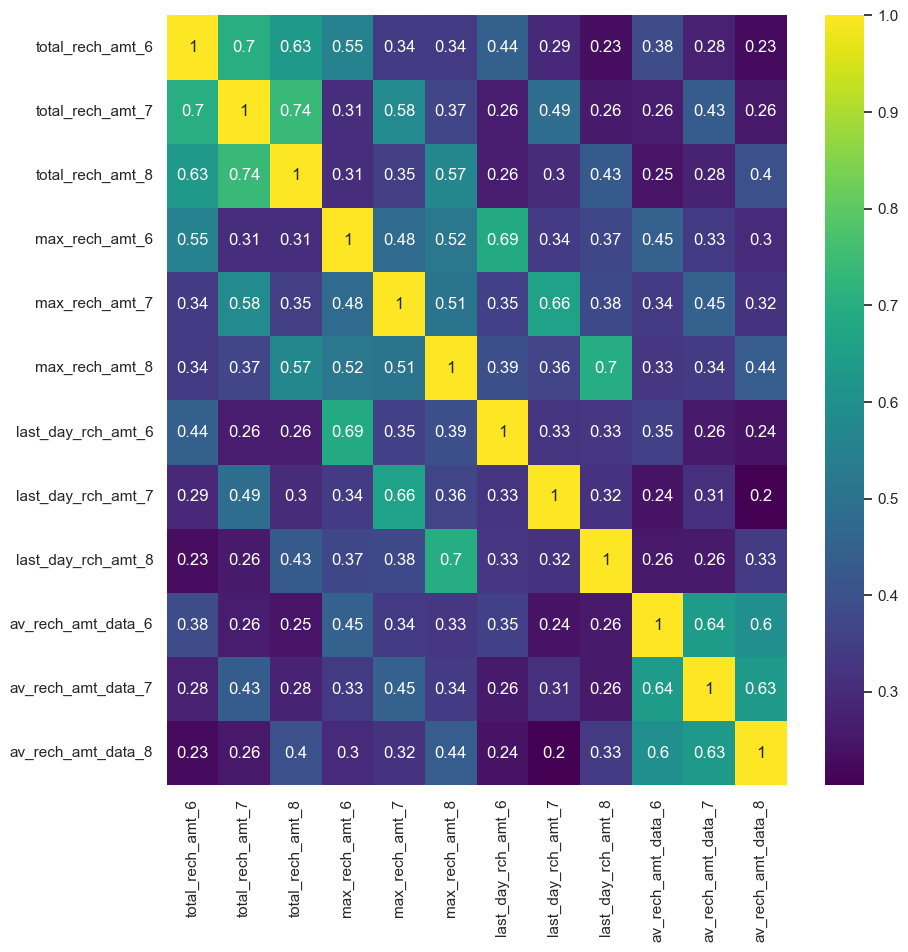

In [43]:
# Amount data
plt.figure(figsize=(10,10))
sns.heatmap(amount_data.corr(), annot=True, cmap='viridis')
plt.show()

In [44]:
data2g = test_df.loc[:, test_df.columns.str.contains('2g')]
data3g = test_df.loc[:, test_df.columns.str.contains('3g')]

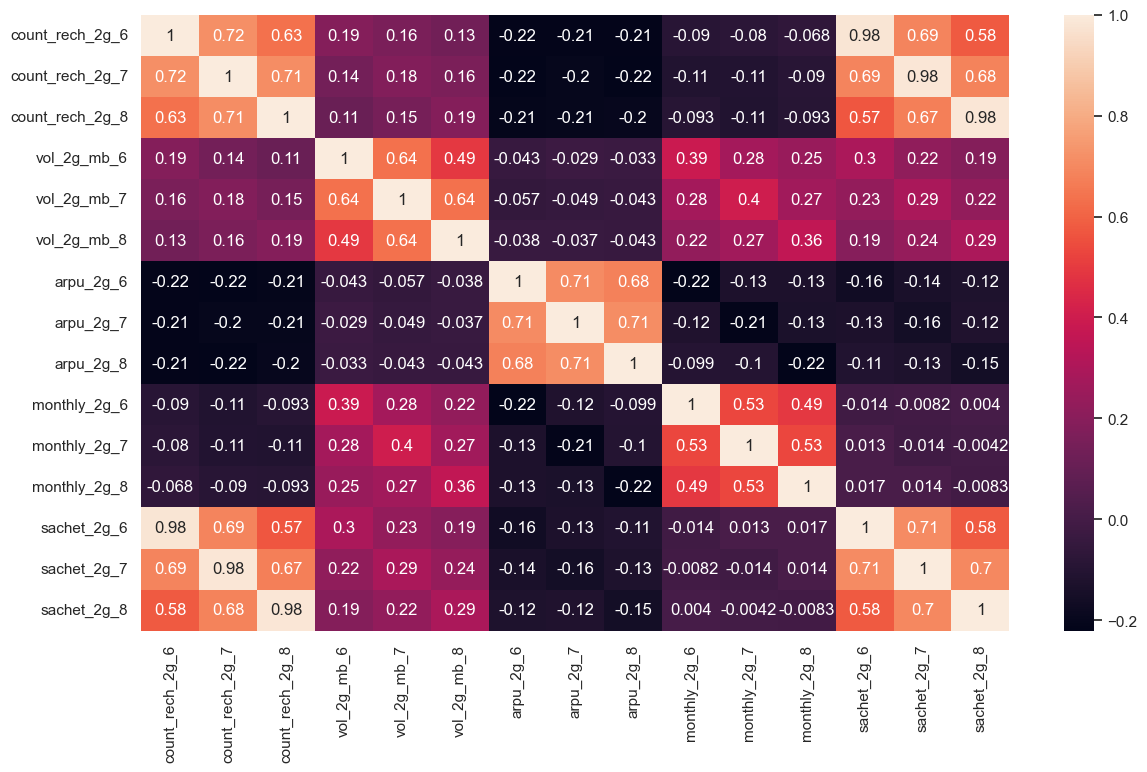

In [45]:
# data2g
plt.figure(figsize=(14,8))
sns.heatmap(data2g.corr(), annot=True)
plt.show()

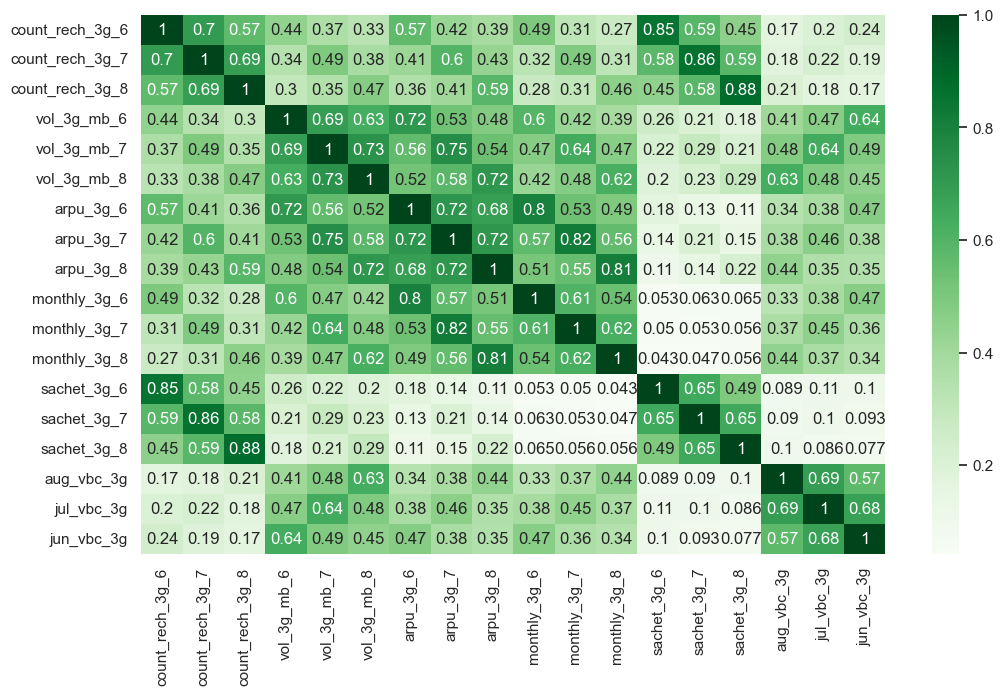

In [46]:
#data3g
plt.figure(figsize=(12,7))
sns.heatmap(data3g.corr(),annot=True, cmap='Greens')
plt.show()

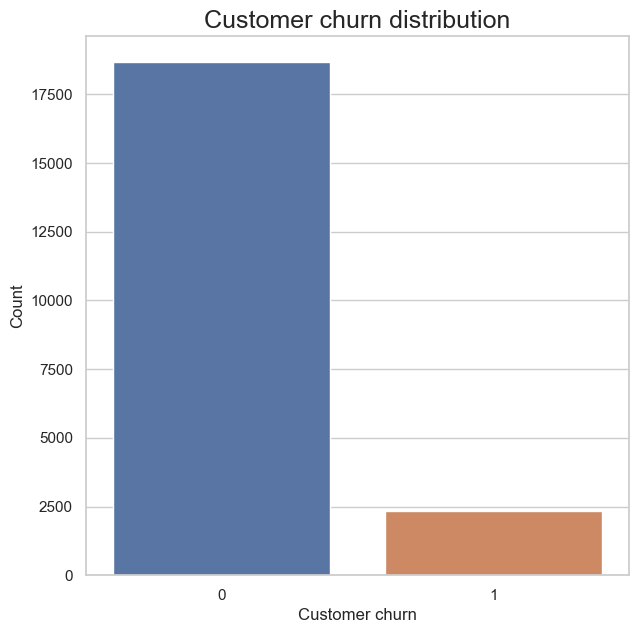

In [47]:
# Visualize churn distribution
plt.figure(figsize=(7, 7))
sns.countplot(x = high_val_cust['churn_probability'])
plt.xlabel('Customer churn', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Customer churn distribution', fontsize=18)
plt.show()

## Handeling Outliers
Features show there a lot of outliers. These can be capped with k-sigma method.

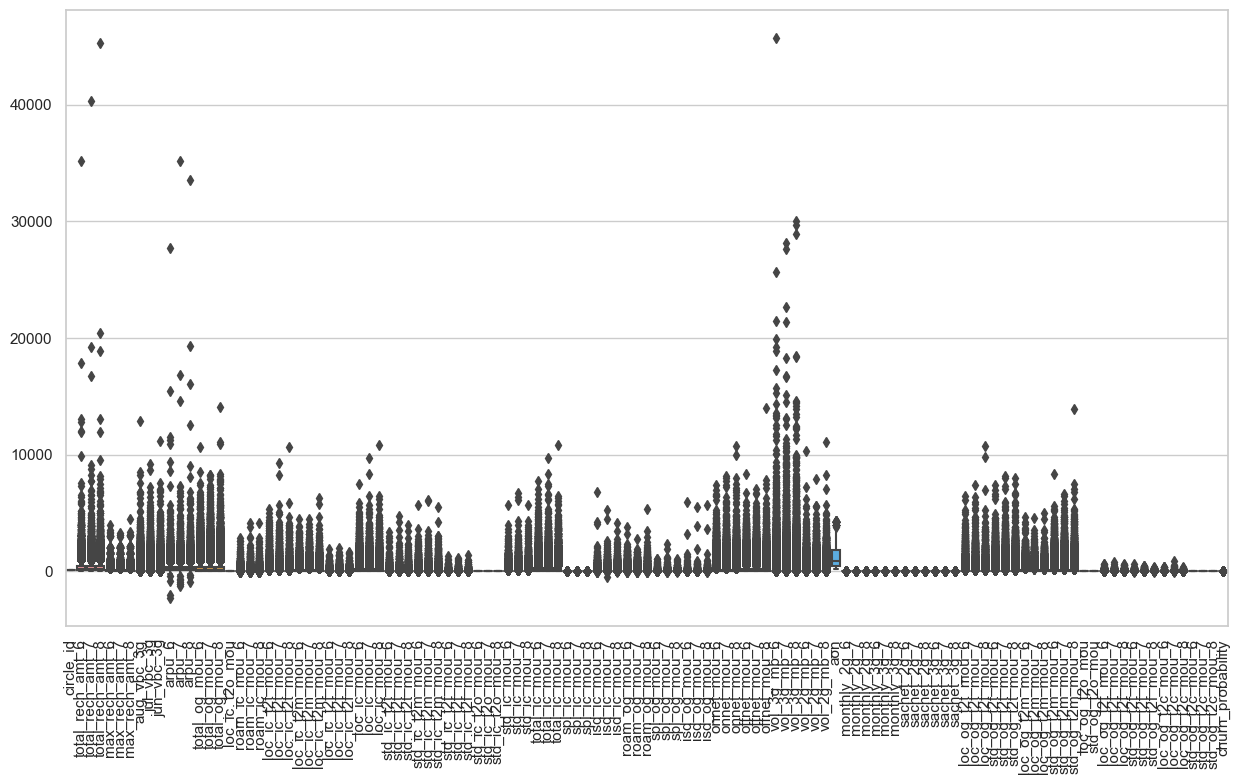

In [48]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.boxplot(data = data_f)
plt.show()

In [49]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [50]:
data_f2 = data_f.apply(cap_outliers, axis=0)
data_f2.head()

circle_id  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  \
id                                                                    
0         109              77.0              65.0              10.0   
1         109               0.0             145.0              50.0   
2         109              70.0             120.0               0.0   
3         109             160.0             240.0             130.0   
4         109             290.0             136.0             122.0   

    max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  aug_vbc_3g  jul_vbc_3g  \
id                                                                           
0             65.0            65.0            10.0         0.0         0.0   
1              0.0           145.0            50.0         0.0         0.0   
2             70.0            70.0             0.0         0.0         0.0   
3            110.0           110.0            50.0         0.0         0.0   
4             50.0            41.0            30.0         0.0         0.0   

    jun_vbc_3g  ...  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
id              ...                                                         
0          0.0  ...              0.00               0.0               0.0   
1          0.0  ...              0.00               0.0               0.0   
2          0.0  ...              0.00               0.0               0.0   
3          0.0  ...              0.56               0.0               0.0   
4          0.0  ...              0.00               0.0               0.0   

    loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  std_og_t2c_mou_6  \
id                                                                           
0               0.00              0.00          0.000000               0.0   
1               0.00             22.01         20.559452               0.0   
2               2.14              0.00          0.000000               0.0   
3               0.00              0.00          8.030000               0.0   
4               0.00              9.85          0.000000               0.0   

    std_og_t2c_mou_7  std_og_t2c_mou_8  churn_probability  
id                                                         
0                0.0               0.0                  0  
1                0.0               0.0                  0  
2                0.0               0.0                  0  
3                0.0               0.0                  0  
4                0.0               0.0                  0  

[5 rows x 117 columns]

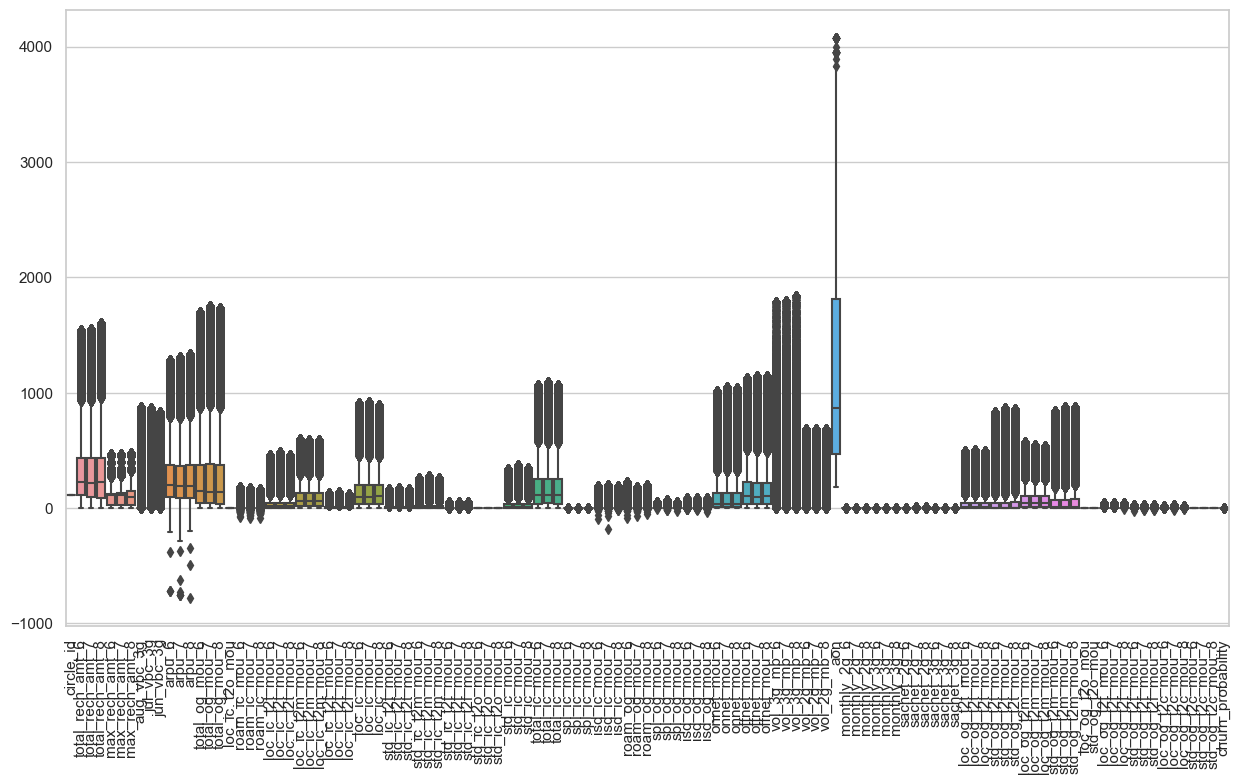

In [51]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.boxplot(data=data_f2)
plt.show()

### DataFrame Scaling

In [52]:
scaler = MinMaxScaler()
df_fs = scaler.fit_transform(data_f2)
X_train_f_s_df = pd.DataFrame(df_fs, columns=data_f2.columns)

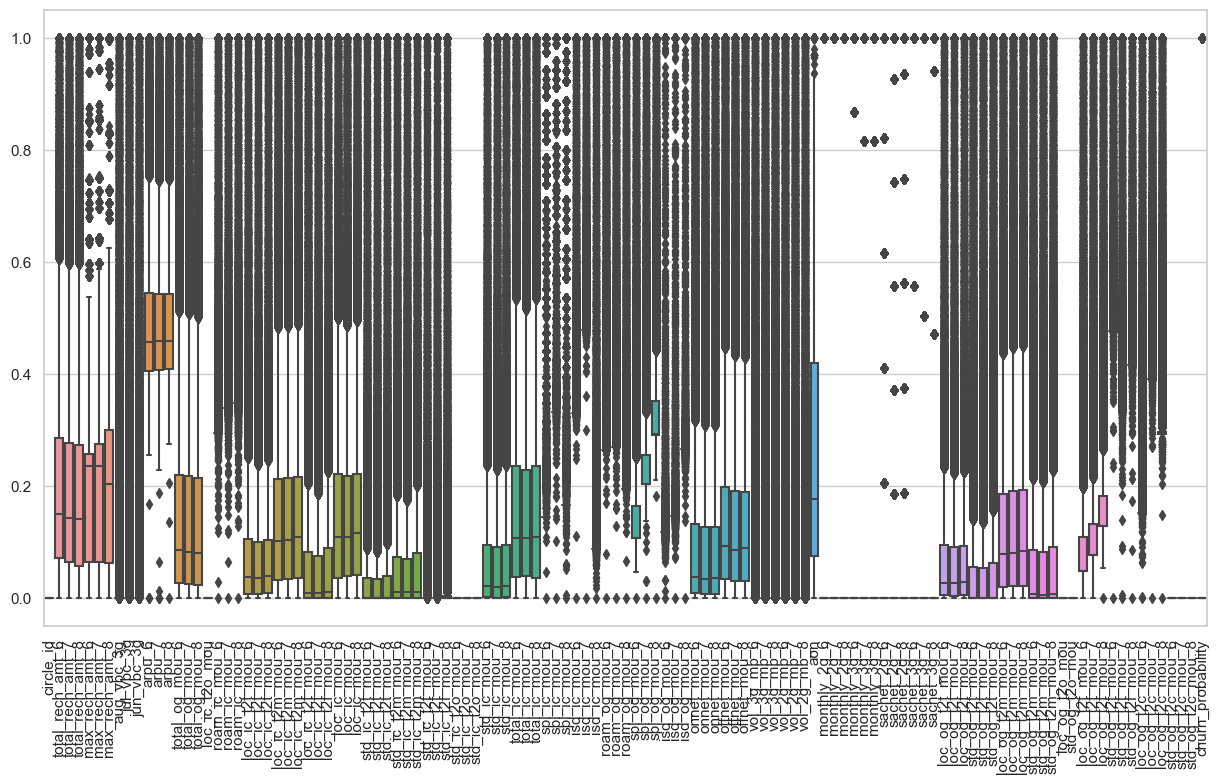

In [53]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
sns.boxplot(data=X_train_f_s_df)
plt.show()

In [54]:
X_train_f_s_df.head()

circle_id  total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  \
0        0.0          0.049975          0.041785          0.006241   
1        0.0          0.000000          0.093212          0.031203   
2        0.0          0.045432          0.077141          0.000000   
3        0.0          0.103844          0.154283          0.081129   
4        0.0          0.188217          0.087427          0.076136   

   max_rech_amt_6  max_rech_amt_7  max_rech_amt_8  aug_vbc_3g  jul_vbc_3g  \
0        0.138654        0.139340        0.020802         0.0         0.0   
1        0.000000        0.310835        0.104008         0.0         0.0   
2        0.149320        0.150058        0.000000         0.0         0.0   
3        0.234645        0.235806        0.104008         0.0         0.0   
4        0.106657        0.087891        0.062405         0.0         0.0   

   jun_vbc_3g  ...  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  \
0         0.0  ...           0.47644           0.33118          0.414634   
1         0.0  ...           0.47644           0.33118          0.414634   
2         0.0  ...           0.47644           0.33118          0.414634   
3         0.0  ...           0.48813           0.33118          0.414634   
4         0.0  ...           0.47644           0.33118          0.414634   

   loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  std_og_t2c_mou_6  \
0          0.151055          0.390543          0.291929               0.0   
1          0.151055          0.933848          1.000000               0.0   
2          0.251829          0.390543          0.291929               0.0   
3          0.151055          0.390543          0.568484               0.0   
4          0.151055          0.633685          0.291929               0.0   

   std_og_t2c_mou_7  std_og_t2c_mou_8  churn_probability  
0               0.0               0.0                0.0  
1               0.0               0.0                0.0  
2               0.0               0.0                0.0  
3               0.0               0.0                0.0  
4               0.0               0.0                0.0  

[5 rows x 117 columns]

## Creating X and Y dataset 


In [55]:
X = X_train_f_s_df.drop(['circle_id'],axis = 1).iloc[:,:-1]
y = X_train_f_s_df.iloc[:,-1]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((55999, 115), (14000, 115), (55999,), (14000,))

In [57]:
# Apply SMOTE outside the pipeline (since it's not a transformer)
smote = SMOTE(random_state=42)

# Perform SMOTE on training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 5. Feature engineering and selection

Let's understand feature importances for raw features as well as components to decide top features for modelling.

In [58]:
# Using Random Forest 
rf = RandomForestClassifier(n_estimators = 100, n_jobs=-1)
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(n_jobs=-1)

In [59]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train_resampled, dt_classifier.predict(X_train_resampled)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train_resampled, dt_classifier.predict(X_train_resampled)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [60]:
evaluate_model(rf)

Train Accuracy : 1.0
Train Confusion Matrix:
[[50289     0]
 [    0 50289]]
--------------------------------------------------
Test Accuracy : 0.933
Test Confusion Matrix:
[[12019   559]
 [  379  1043]]


In [61]:
feature_importances = pd.DataFrame({'col':X_train.columns, 'importance':rf.feature_importances_})
feature_importances

col  importance
0    total_rech_amt_6    0.004864
1    total_rech_amt_7    0.005130
2    total_rech_amt_8    0.043785
3      max_rech_amt_6    0.006206
4      max_rech_amt_7    0.006771
..                ...         ...
110  loc_og_t2c_mou_7    0.004605
111  loc_og_t2c_mou_8    0.010958
112  std_og_t2c_mou_6    0.000000
113  std_og_t2c_mou_7    0.000000
114  std_og_t2c_mou_8    0.000000

[115 rows x 2 columns]

<BarContainer object of 115 artists>

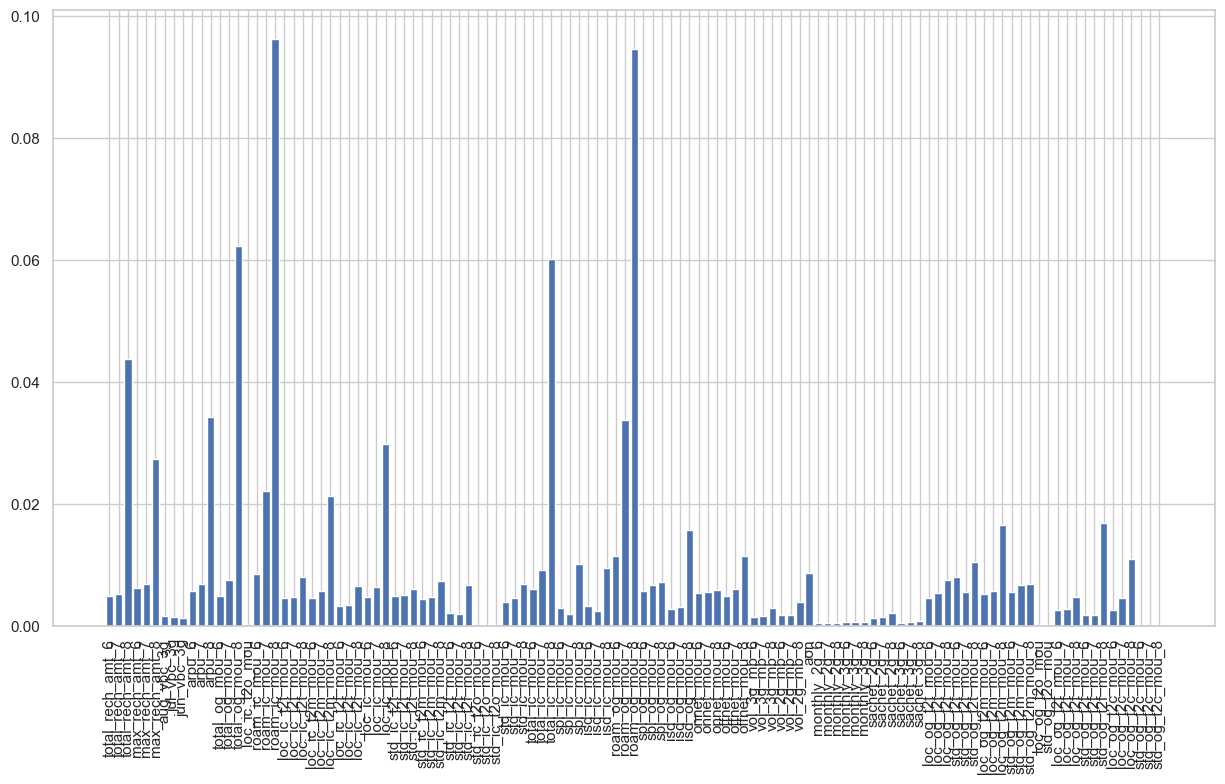

In [62]:
plt.figure(figsize=(15,8))
plt.xticks(rotation = 90)
plt.bar(feature_importances['col'],feature_importances['importance'])

### Using PCA 

In [63]:
# Having a look at the Data Frame
X_train.head()

total_rech_amt_6  total_rech_amt_7  total_rech_amt_8  max_rech_amt_6  \
47338          0.000000          0.000000          0.248379        0.000000   
67455          0.112930          0.036642          0.043685        0.063994   
12308          0.051922          0.051428          0.024963        0.063994   
52334          0.146680          0.151711          0.084873        0.234645   
664            0.428356          0.070713          0.000000        0.234645   

       max_rech_amt_7  max_rech_amt_8  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  \
47338        0.000000        0.827907         0.0         0.0         0.0   
67455        0.064311        0.062405         0.0         0.0         0.0   
12308        0.107185        0.062405         0.0         0.0         0.0   
52334        0.235806        0.104008         0.0         0.0         0.0   
664          0.235806        0.000000         0.0         0.0         0.0   

         arpu_6  ...  loc_og_t2f_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  \
47338  0.444704  ...          0.692826           0.47644           0.33118   
67455  0.436406  ...          0.127557           0.47644           0.33118   
12308  0.392858  ...          0.127557           0.47644           0.33118   
52334  0.428205  ...          0.127557           0.47644           0.33118   
664    0.595947  ...          0.160767           0.47644           0.33118   

       std_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  \
47338          0.414634          0.151055          0.431519          0.291929   
67455          0.414634          1.000000          0.390543          0.291929   
12308          0.414634          0.151055          0.426582          0.291929   
52334          0.414634          0.151055          0.399182          0.291929   
664            0.442162          0.151055          0.390543          0.328586   

       std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  
47338               0.0               0.0               0.0  
67455               0.0               0.0               0.0  
12308               0.0               0.0               0.0  
52334               0.0               0.0               0.0  
664                 0.0               0.0               0.0  

[5 rows x 115 columns]

In [64]:
pca = PCA(0.9, random_state = 42)
pca_components = pca.fit(X_train_resampled)
pca.components_

array([[ 0.2095422 ,  0.22077598,  0.18487954, ..., -0.        ,
        -0.        , -0.        ],
       [ 0.09468189,  0.07626054,  0.00901547, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.07893196,  0.11576734,  0.1066268 , ..., -0.        ,
        -0.        , -0.        ],
       ...,
       [ 0.1880851 ,  0.08862702,  0.13868013, ..., -0.        ,
        -0.        , -0.        ],
       [-0.03774637, -0.01916547,  0.01418273, ..., -0.        ,
        -0.        , -0.        ],
       [-0.10995778,  0.0335    , -0.08012123, ..., -0.        ,
        -0.        , -0.        ]])

<BarContainer object of 115 artists>

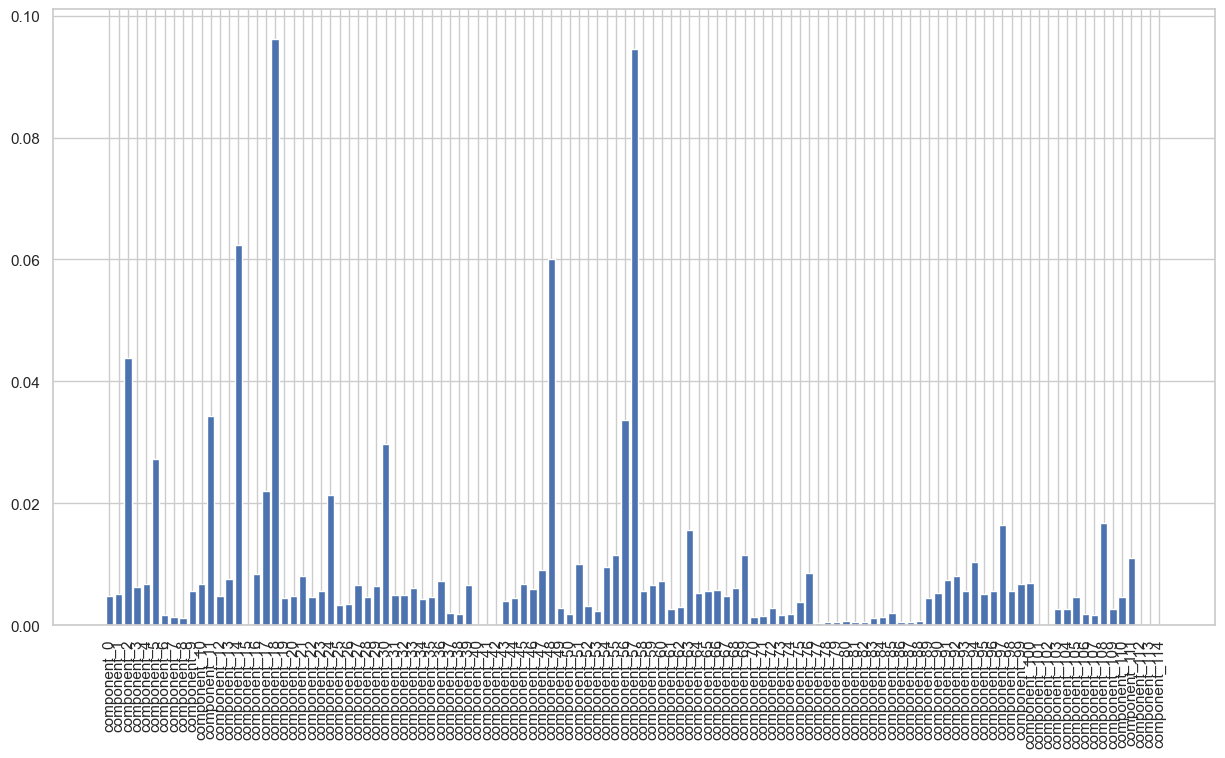

In [65]:
feature_importances = pd.DataFrame({'col':['component_'+str(i) for i in range(115)], 
                                    'importance':rf.feature_importances_})

plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
plt.bar(feature_importances['col'], feature_importances['importance'])

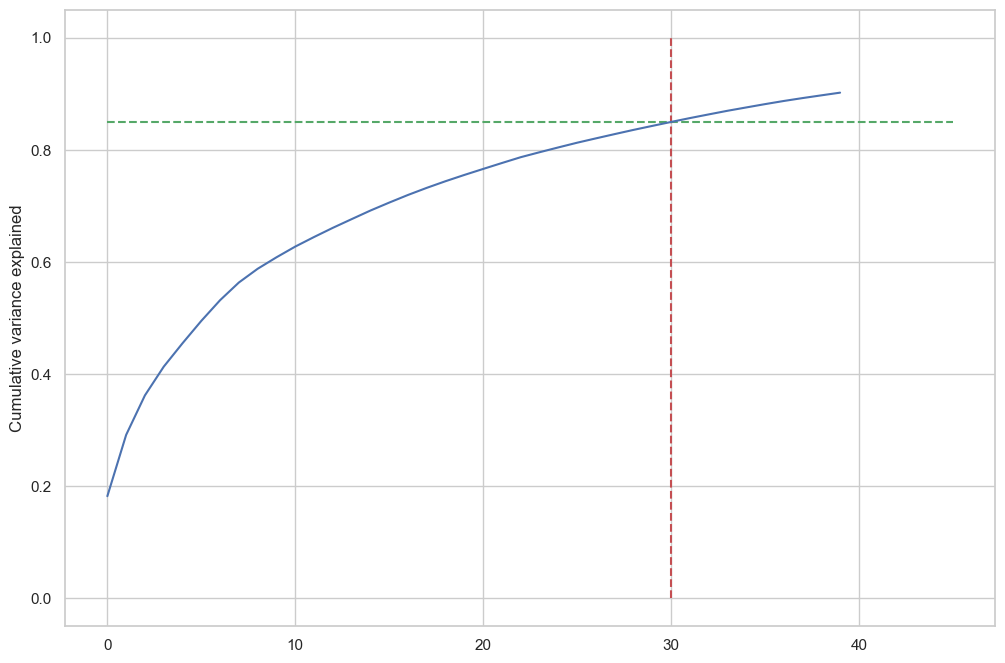

In [66]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

fig = plt.figure(figsize=[12,8])
plt.vlines(x=30, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.85, xmax=45, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

### First Model 

In [67]:
pca_final = IncrementalPCA(n_components=30)
X_train_pca = pca_final.fit_transform(X_train_resampled)
corrmat = np.corrcoef(X_train_pca.transpose())
corrmat.shape, X_train_pca.shape

((30, 30), (100578, 30))

<Axes: >

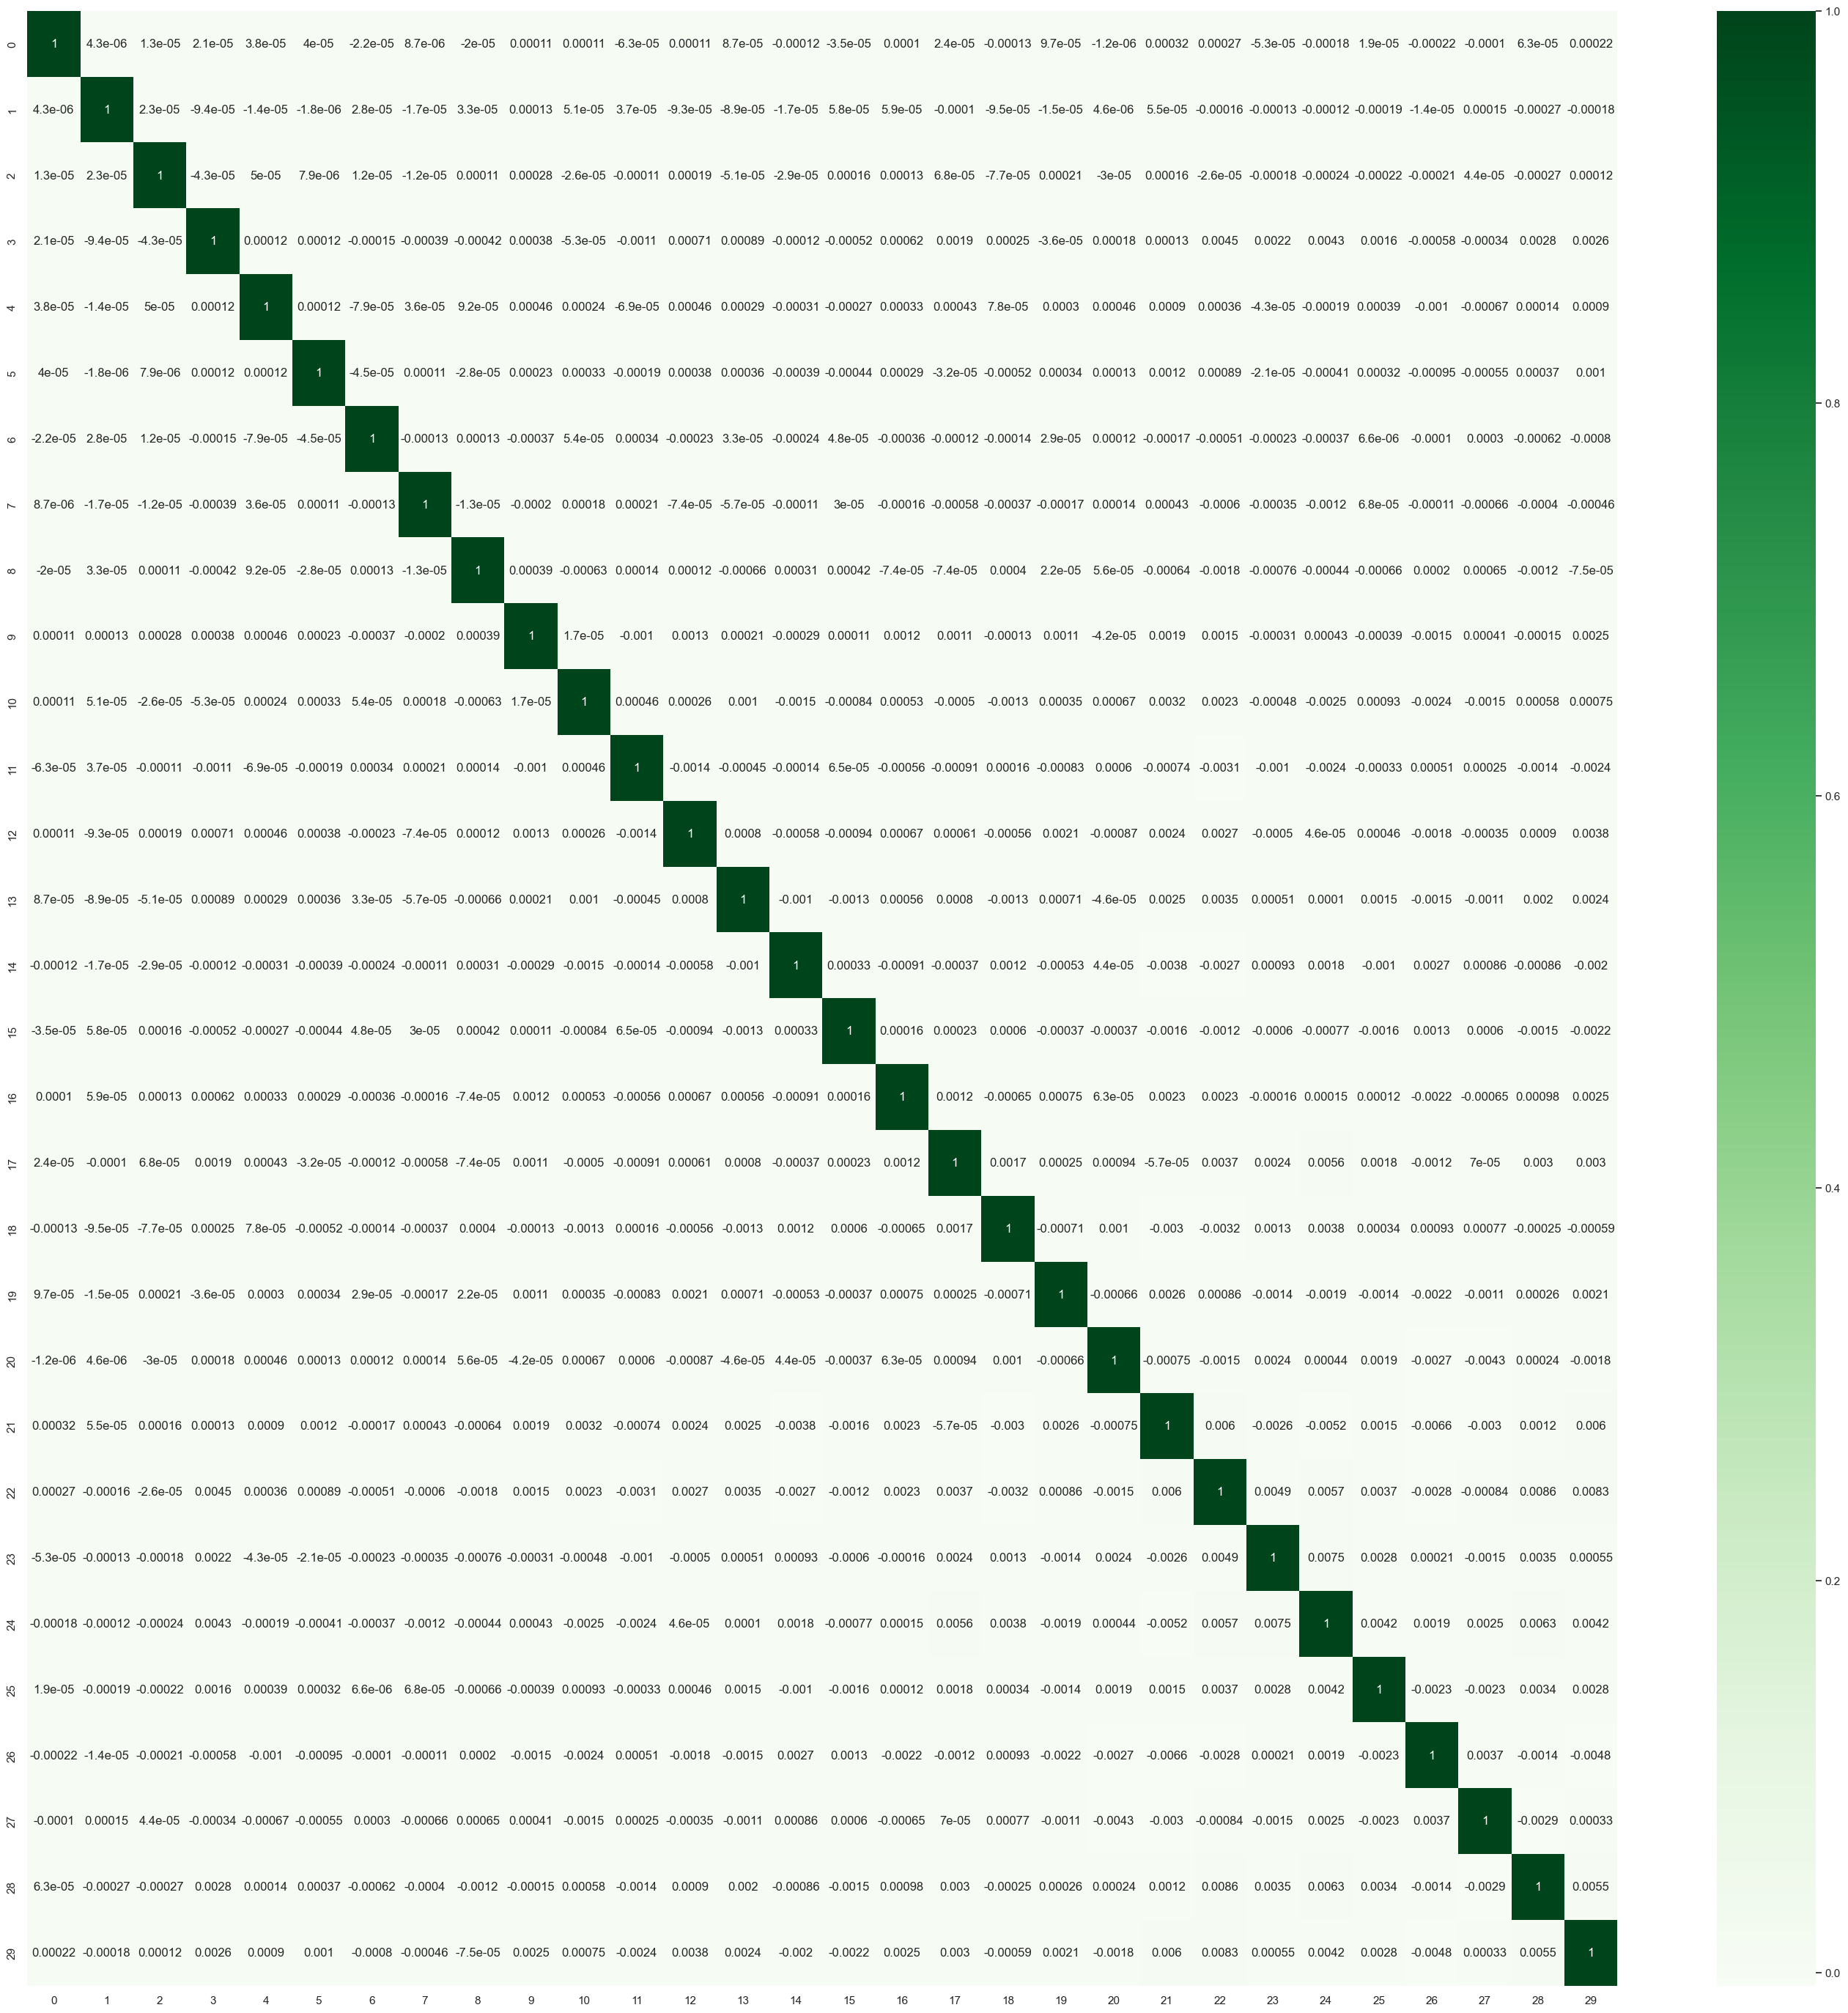

In [69]:
plt.figure(figsize=[35,35])
sns.heatmap(corrmat, annot=True, cmap='Greens')

### Applying logistic regression on the data on our Principal components

In [70]:
lr = LogisticRegression()
lr.fit(X_train_pca, y_train_resampled)

LogisticRegression()

In [71]:
lr.score(X_train_pca, y_train_resampled)

0.797351309431486

In [72]:
# Define the parameter grid for Logistic Regression
param_grid = {
    'penalty': ['l2'],                     # Regularization penalty
    'C': [0.1, 1, 10],                    # Regularization strength
    'solver': ['lbfgs', 'liblinear'],      # Optimization solver
    'max_iter': [100, 200],                # Maximum number of iterations
    'fit_intercept': [True, False],        # Whether to include an intercept term
    'class_weight': [None, 'balanced'],    # Weights for classes
}

# Create the Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Create a KFold cross-validation object
folds = KFold(n_splits=5, shuffle=True, random_state=42)

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='accuracy',  # Scoring metric
    cv=folds,            # 5-fold cross-validation
    n_jobs=-1,           # Use all cores for parallelism
    verbose=2            # Show progress
)

# Fit the model using GridSearchCV
grid_search.fit(X_train_pca, y_train_resampled)

# Best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

# Best score from cross-validation
print("Best cross-validated accuracy:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_train_pca)
test_accuracy = accuracy_score(y_train_resampled, y_pred)
print("Test accuracy:", test_accuracy)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best hyperparameters: {'C': 10, 'class_weight': 'balanced', 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Best cross-validated accuracy: 0.7972220593587271
Test accuracy: 0.7974209071566346


### ___First Pipeline___

In [73]:
imp = IterativeImputer(max_iter=2, random_state=42)
scale = MinMaxScaler()
pca = IncrementalPCA(n_components=30)
lr = LogisticRegression(C= 10, class_weight=None, fit_intercept=True, max_iter=100, penalty='l2', solver='liblinear')

In [74]:
pipe = Pipeline(steps = [('imputation',imp),
                         ('scaling',scale),
                         ('pca',pca_final),
                         ('model',lr)])

In [75]:
pipe.fit(X_train_resampled, y_train_resampled)

Pipeline(steps=[('imputation', IterativeImputer(max_iter=2, random_state=42)),
                ('scaling', MinMaxScaler()),
                ('pca', IncrementalPCA(n_components=30)),
                ('model', LogisticRegression(C=10, solver='liblinear'))])

In [76]:
train_score = pipe.score(X_train_resampled, y_train_resampled)
print("Training accuracy:", train_score)

Training accuracy: 0.7999960229871343


In [77]:
test_score = pipe.score(X_test, y_test)
print("Test accuracy:", test_score)

Test accuracy: 0.7740714285714285


In [78]:
confusion_matrix(y_train_resampled, pipe.predict(X_train_resampled))

array([[38866, 11423],
       [ 8693, 41596]], dtype=int64)

In [79]:
confusion_matrix(y_test, pipe.predict(X_test))

array([[9685, 2893],
       [ 270, 1152]], dtype=int64)

In [80]:
precision_score(y_test, pipe.predict(X_test))

0.28479604449938195

In [81]:
recall_score(y_test, pipe.predict(X_test))

0.810126582278481

In [82]:
f1_score(y_test, pipe.predict(X_test))

0.4214377172123651

## Ada Boost

In [83]:
# Second Pipleine cosidering different model

In [84]:
# Define AdaBoost classifier with a base decision tree estimator
adaboost_clf = AdaBoostClassifier(n_estimators = 200, random_state=42)

adaboost_clf.fit(X_train_resampled, y_train_resampled)

y_pred = adaboost_clf.predict(X_test)

In [85]:
print('Accuracy of the model is:  ',accuracy_score(y_test, y_pred))

Accuracy of the model is:   0.9097857142857143


In [86]:
cm = confusion_matrix(y_test, y_pred)
print('The confusion Matrix : \n',cm)

The confusion Matrix : 
 [[11669   909]
 [  354  1068]]


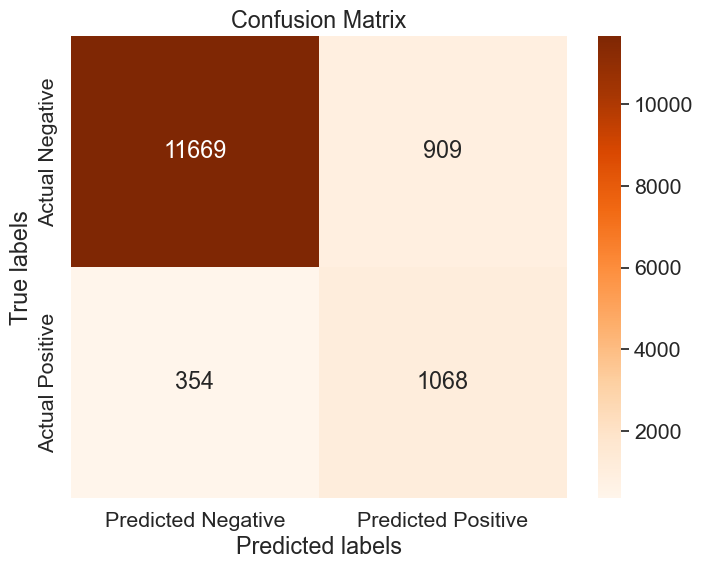

In [89]:
# Define labels for the confusion matrix
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Reshape the confusion matrix into a 2x2 array
cm_array = np.array(cm).reshape(2,2)

# Create the heatmap
plt.figure(figsize=(8,6))
sns.set(font_scale=1.4)
sns.heatmap(cm_array, annot=True, cmap='Oranges', fmt='g', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [97]:
from sklearn.metrics import roc_curve, auc

In [99]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)


In [ ]:
# Define AdaBoost classifier with a base decision tree estimator
adaboost_clf = AdaBoostClassifier(random_state=42)

# Define parameter grid for AdaBoost
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages (trees)
    'learning_rate': [0.01, 0.1, 1.0],  # Step size at each iteration
}

# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=adaboost_clf,
    param_grid=param_grid,
    scoring='f1',  # Use F1 score for evaluation
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_train_resampled, y_train_resampled)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [ ]:
# Define the pipeline using scikit-learn's pipeline (with imblearn's SMOTE outside)
pipe = Pipeline(steps=[
    ('imputation', IterativeImputer(max_iter=2, random_state=42)),  # Imputation
    ('scaling', MinMaxScaler()),  # Scaling
    ('pca', PCA(n_components=5)),  # PCA
    ('model', AdaBoostClassifier(learning_rate= 1.0, n_estimators= 200, random_state=42))  # XGBoost
     ])
     # Fit GridSearchCV on resampled data
pipe.fit(X_train_resampled, y_train_resampled)

In [ ]:
train_score = pipe.score(X_train, y_train)
print("Training accuracy:", train_score)

In [ ]:
test_score = pipe.score(X_test, y_test)
print("Test accuracy:", test_score)